<a href="https://colab.research.google.com/github/asevillano24/deepLearning/blob/master/TFG_Antonio_Sevillano_Martin_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.0 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00


In [ ]:
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
!pip install emoji_extractor
!pip install emoji

--2023-07-06 11:00:28--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   296KB/s    in 0.3s    

2023-07-06 11:00:30 (296 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  
  Preparing metadata (setup.py) ... done
  Created wheel for emoji_extractor: filename=emoji_extractor-2.0.0-py3-none-any.whl size=64157 sha256=bf11739b14703620d370cca0817ce2d94bb4052aac9f9370c6c35f00e3f0fd05
  Stored in directory: /root/.cache/pip/wheels/14/89/95/33d1b161e1daa8fb2dec089e887d3620d3a318fdb0798e9f58
Successfully built emoji_extractor
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Instala snscrape
!pip install snscrape

# Importa las librerías necesarias
import snscrape.modules.twitter as sntwitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
!pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.6 MB/s eta 0:00:00


In [ ]:
#Importamos las librerias multifuncionales
import os
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import re
from collections import Counter

# Importamos la biblioteca nltk y los elementos necesarios para el procesamiento.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Importamos el extractor de emojis
from emoji_extractor.extract import Extractor
# Importamos el objeto SnowballStemmer para el idioma español, este será contenido por la variable stemmer.
from nltk.stem import SnowballStemmer

# Importamos la signación de ID Hash
import hashlib

#Importamos la distancia Levenshtein para facilitar la asignación de IDs
from Levenshtein import distance

#Importamos la librería Matplolib y WordCloud para plotear los gráficos necesarios.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Descargamos los stopwords y los tokens para el idioma español
nltk.download('stopwords')
nltk.download('punkt')

# ---------MODELOS DE ANÁLISIS DE SENTIMIENTO-----------
from transformers import pipeline
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import BertTokenizer, BertForSequenceClassification
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# ---------MÉTRICAS DE PRECISIÓN-----------
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#----------LOCATION-----------------------
import json

# ---------Visulizaciones: Analisis base de datos--------------------



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Leemos los dataframes en Español

# Procesamiento de la base de Datos

In [ ]:
# Creamos las variables stop_words y stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

## Función Eliminar Caracteres Indesados

In [ ]:
def eliminar_caracteres_indeseados(tweet):
    # Eliminar URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Eliminar menciones
    tweet = re.sub(r'@\w+', '', tweet)
    # Buscar hashtags y guardarlos en una lista
    hashtags = re.findall(r'#\w+', tweet)
    # Iterar sobre la lista de hashtags y reemplazar cada ocurrencia en el tweet original
    for hashtag in hashtags:
        tweet = tweet.replace(hashtag, hashtag[1:])
    # Eliminar signos de puntuación
    tweet = re.sub(r'[^\w\s]', '', tweet)
    return tweet

La función eliminar_caracteres_indeseados recibe un tweet como entrada y realiza las siguientes acciones:


1.   Utiliza la expresión regular re.sub(r'http\S+', '', tweet) para eliminar las URLs del tweet.
2.   Utiliza la expresión regular re.sub(r'@\w+', '', tweet) para eliminar las menciones (usuarios mencionados) del tweet.
3.   Utiliza la expresión regular re.findall(r'#\w+', tweet) para buscar y guardar los hashtags en una lista.
4.   Itera sobre la lista de hashtags y reemplaza cada ocurrencia en el tweet original, eliminando el símbolo '#' del hashtag.
5.   Utiliza la expresión regular re.sub(r'[^\w\s]', '', tweet) para eliminar los signos de puntuación del tweet.
6.   Devuelve el tweet modificado, es decir, el tweet sin URLs, menciones, hashtags con símbolo '#' y signos de puntuación.



## Función Tokenizar

In [ ]:
def tokenizar(text):
    return nltk.word_tokenize(text)

La función tokenizar recibe un texto como entrada y realiza las siguientes acciones:



1.   Utiliza el módulo nltk para realizar la tokenización de palabras en el texto.
2.   Aplica la función word_tokenize() de nltk al texto.
3.   Divide el texto en una lista de palabras individuales, separando cada palabra por sus límites.
4.   Devuelve la lista de palabras tokenizadas.



## Función Eliminar Stopwords

In [ ]:
# Función para eliminar stopwords
def eliminar_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

La función eliminar_stopwords recibe una lista de tokens como entrada y realiza las siguientes acciones:


1.   Utiliza una comprensión de lista para iterar sobre cada token en la lista de tokens.
2.   Convierte cada token a minúsculas utilizando el método lower().
3.   Verifica si el token en minúsculas no está presente en la lista de palabras vacías (stop_words).
5.   Si el token no está en la lista de palabras vacías, se agrega a la lista filtered_tokens.
4.   Devuelve la lista de tokens filtrados que no contienen stopwords.


## Función Lematizar

In [ ]:
def lematizar(tokens):
    lemmas = [stemmer.stem(token) for token in tokens]
    return lemmas

La función lematizar recibe una lista de tokens como entrada y realiza las siguientes acciones:


1.   Utiliza una comprensión de lista para iterar sobre cada token en la lista de tokens.
2.   Aplica un proceso de lematización a cada token utilizando el objeto stemmer.
3.   Guarda los lemas resultantes en una lista llamada lemmas.
4.   Devuelve la lista de lemas.



## Función para eliminar caracteres especiales

In [ ]:
# Función para eliminar caracteres especiales o no alfabéticos
def eliminar_caracteres_especiales(tweet):
    tweet = re.sub(r'\d+', '', tweet) # Eliminar números
    tweet = re.sub(r'[^\w\s]', '', tweet) # Eliminar signos de puntuación
    tweet = re.sub(r'\n', '', tweet)
    return tweet

La función eliminar_caracteres_especiales recibe un tweet como entrada y realiza las siguientes acciones:


1.   Elimina los números del tweet usando re.sub(r'\d+', '', tweet).
2.   Elimina los signos de puntuación del tweet usando re.sub(r'[^\w\s]', '', tweet).
3.   Elimina los saltos de línea del tweet usando re.sub(r'\n', '', tweet).
4.   Devuelve el tweet modificado sin números, signos de puntuación y saltos de línea.



## Extraer emojis en una columna nueva y eliminarlos del texto original

In [ ]:
def extract_emojis_and_remove(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    emojis_list = emoji_pattern.findall(text)
    text_without_emojis = emoji_pattern.sub(r'', text)
    return emojis_list, text_without_emojis

La función extract_emojis_and_remove utiliza una expresión regular para buscar y extraer los emojis presentes en un texto. A continuación, elimina esos emojis del texto original, devolviendo una lista con los emojis extraídos y el texto sin emojis. Resumido en 6 líneas:

1.   Crea un patrón de expresión regular para identificar emojis en el texto.
2.   Extrae los emojis encontrados en el texto y los guarda en una lista.
3.   Remueve los emojis del texto original.
4.   Devuelve una tupla con la lista de emojis extraídos y el texto sin emojis.


## TRADUCTOR CON TRANSFORMERS


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-es-en")
translator = pipeline("translation_es_to_en", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator = pipeline("translation_es_to_en", model=model, tokenizer=tokenizer)

In [ ]:
# función de traducción
def translate(text):
    return translator(text, max_length=250)[0]['translation_text']



**Carga del Tokenizer**: Se utiliza la función AutoTokenizer.from_pretrained() de la biblioteca Hugging Face para cargar un tokenizer pre-entrenado. En este caso, se carga el tokenizer "Helsinki-NLP/opus-mt-es-en" que está diseñado para la traducción de español a inglés. El tokenizer se asigna a la variable tokenizer.

**Carga del Modelo**: Se utiliza la función AutoModelForSeq2SeqLM.from_pretrained() de la biblioteca Hugging Face para cargar un modelo pre-entrenado. En este caso, se carga el modelo "Helsinki-NLP/opus-mt-es-en" que está específicamente entrenado para realizar traducción de secuencia a secuencia de español a inglés. El modelo se asigna a la variable model.

**Creación del Traductor**: Se utiliza la función pipeline() de la biblioteca Hugging Face para crear un objeto traductor. El traductor se configura para la tarea de traducción de español a inglés mediante el parámetro "translation_es_to_en". Además, se especifica el modelo y el tokenizer pre-entrenados utilizando los argumentos model=model y tokenizer=tokenizer. El traductor se asigna a la variable translator.

**Definición de la Función de Traducción**: Se define una función llamada translate que toma como entrada un texto en español. La función utiliza el traductor previamente creado (translator) para realizar la traducción del texto a inglés. Se especifica un límite máximo de longitud de traducción de 250 tokens mediante el parámetro max_length=250. La función retorna el texto traducido al inglés.

## LOWERCASE_COLUMN (Mayusculas a minusculas)

In [ ]:
def convertir_a_minusculas(df, columna):
    df[columna] = df[columna].str.lower()
    return df

La función lowercase_column recibe un DataFrame y el nombre de una columna como entrada. Luego, modifica los valores de esa columna en el DataFrame para convertirlos a minúsculas. Finalmente, devuelve el DataFrame modificado con los valores en minúsculas en la columna especificada.

## Generador de ID para cada tweet (Técnica Hash y Levenshtein)

In [ ]:
def assign_unique_ids(df):
    # Crear una columna para los IDs únicos
    df['unique_id'] = ''

    # Crear un diccionario para almacenar los textos de los tweets y sus correspondientes IDs únicos
    tweet_dict = {}

    # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        tweet_text = row['Text']
        username = row['Username']

        # Calcular el hash del texto del tweet
        tweet_hash = hashlib.sha256(tweet_text.encode()).hexdigest()

        # Buscar tweets similares en el diccionario
        similar_tweets = []
        for key, value in tweet_dict.items():
            if distance(tweet_text, value['text']) <= 2:
                similar_tweets.append(key)

        # Si se encontraron tweets similares
        if similar_tweets:
            # Asignar el mismo ID a los tweets similares
            for tweet_id in similar_tweets:
                df.at[index, 'unique_id'] = tweet_id
        else:
            # Asignar un nuevo ID único al tweet
            new_id = f'{username}_{tweet_hash[:8]}'  # Concatenar username y los primeros 8 caracteres del hash
            df.at[index, 'unique_id'] = new_id

            # Agregar el nuevo tweet al diccionario
            tweet_dict[new_id] = {'text': tweet_text}

    return df


Recorremos el DataFrame utilizando el método iterrows() para aplicar la función obtener_id_tweet a cada fila. La función compara el texto del tweet con los tweets anteriores en el DataFrame utilizando la distancia de Levenshtein. Si encuentra un tweet similar (con una distancia menor o igual a 2), asigna el mismo ID único. De lo contrario, genera un nuevo ID único combinando el hash del mensaje y la longitud del tweet.

Al final, el DataFrame tweets_df contendrá una columna adicional "id_tweet" con los IDs únicos para cada tweet, teniendo en cuenta tanto la similitud de texto como la longitud del tweet.

## Eliminar Filas por IDs Duplicados

In [ ]:
def eliminar_filas_duplicadas_por_id(dataframe):
    dataframe.drop_duplicates(subset='unique_id', keep='first', inplace=True)
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

La función eliminar_filas_duplicadas_por_id toma un DataFrame como entrada y utiliza el método drop_duplicates de Pandas para eliminar las filas duplicadas.



1.    El argumento subset='unique_id' especifica que solo se debe considerar la columna 'unique_id' para detectar duplicados.
2.   El argumento keep='first' indica que se debe mantener la primera aparición de cada fila duplicada y eliminar las siguientes.
3.    El argumento inplace=True asegura que los cambios se apliquen directamente en el DataFrame original.
4.   Por último, el método reset_index se utiliza para reindexar las filas del DataFrame después de eliminar las duplicadas y eliminar el índice anterior. Esto evita que el índice contenga saltos o valores duplicados.



Por último, el método reset_index se utiliza para reindexar las filas del DataFrame después de eliminar las duplicadas y eliminar el índice anterior. Esto evita que el índice contenga saltos o valores duplicados.

# Aplicamos las Funciones
Pasos:


1.   Leemos el Pandas Dataframe.
2.   Modificamos la columna 'datetime' en formato correcto.
3.   Asignamos los IDs únicos a cada uno de los tweets.
4.   Eliminamos la columna 'Tweet Id' con los IDs erroneos de los tweets.
5.   Eliminamos los duplicados en base a los nuevos tweets.
6.   Extraemos los emojis del texto.
7.   Eliminamos caracteres Indeseados(URLs, @,...).
8.   Convertimos todo el texto a minúsculas.
9.   Traducimos el texto.
10.   Eliminamos caracteres especiales (signos de puntuación, números).




## Limpieza y Procesamiento General

In [ ]:
#Leemos la base de datos
Tweets_df_General = pd.read_csv('/content/Tweets_df_General_limpio.csv')

In [ ]:
Tweets_df_General.shape

(30530, 10)

Se modifica la columna 'datetime' de un DataFrame de pandas para que tenga un formato correcto '%Y-%m-%d %H:%M:%S'

In [ ]:
Tweets_df_General = Tweets_df_General.drop(index=2649)
# Convertir la columna 'datetime' a tipo datetime
Tweets_df_General['Datetime'] = pd.to_datetime(Tweets_df_General['Datetime'])

# Formatear la columna 'datetime' con el formato deseado
Tweets_df_General['Datetime'] = Tweets_df_General['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')


Generamos IDs únicos para cada tweet

In [ ]:
# Aplicar la función assign_unique_ids al DataFrame
Tweets_df_General = assign_unique_ids(Tweets_df_General)

Eliminamos la columna 'Tweet Id'

In [ ]:
#eliminamos la columna TWeet Id que no es correcta
Tweets_df_General = Tweets_df_General.drop('Tweet Id', axis=1)

Eliminamos los duplicados en base a los nuevos Ids

In [ ]:
Tweets_df_General = eliminar_filas_duplicadas_por_id(Tweets_df_General)

Extraemos los emojis del texto

In [ ]:
#Extraemos los emojis y los guardamos en una nueva columna
Tweets_df_General[['emojis', 'Text']] = Tweets_df_General['Text'].apply(extract_emojis_and_remove).apply(pd.Series)

Eliminamos caracteres Indeseados(URLs, @,...)

In [ ]:
Tweets_df_General['Text'] = Tweets_df_General['Text'].apply(eliminar_caracteres_indeseados)

Convertimos todo el texto a minúsculas

In [ ]:
Tweets_df_General = convertir_a_minusculas(Tweets_df_General, 'Text')

Traducimos el texto

PRIMEROS 10.000


In [ ]:
#Aplicamos la traducción
# aplicar la función a cada celda del DataFrame
Tweets_df_General_terceros_30000['Text'] = Tweets_df_General_terceros_30000['Text'].map(translate)

<ipython-input-27-b8eb8dcc89cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_df_General_terceros_30000['Text'] = Tweets_df_General_terceros_30000['Text'].map(translate)


#### Juntamos los 3 Dataframes tras la traducción.

In [ ]:
#Leemos la base de datos
Tweets_df_General1 = pd.read_csv('/content/Tweets_df_General_primeros_10000.csv')
#Leemos la base de datos
Tweets_df_General2 = pd.read_csv('/content/Tweets_df_General_segundos_20000.csv')
#Leemos la base de datos
Tweets_df_General3 = pd.read_csv('/content/Tweets_df_General_terceros_30000.csv')
# Concatenar verticalmente
Tweets_df_General_completo = pd.concat([Tweets_df_General1, Tweets_df_General2, Tweets_df_General3], axis=0)

In [ ]:
Tweets_df_General_completo.shape

(30530, 10)

Eliminamos caracteres especiales (signos de puntuación, números)

In [ ]:
Tweets_df_General_completo['Text'] = Tweets_df_General_completo['Text'].apply(eliminar_caracteres_especiales)

In [ ]:
Tweets_df_General_completo = eliminar_filas_duplicadas_por_id(Tweets_df_General_completo)

## Procesamiento de la variable Location

In [ ]:
with open('/content/poblaciones.json') as f:
  poblaciones = json.load(f)

In [ ]:
# Extraer los datos de la etiqueta "label" y quedarse solo con lo anterior a "/" o ","
ciudades = [poblacion['label'].split('/')[0].split(',')[0].strip() for poblacion in poblaciones]



In [ ]:
ciudades

In [ ]:
# Eliminar los valores NaN en la columna 'location'
Tweets_df_General_completo.dropna(subset=['location'], inplace=True)

In [ ]:
# Filtrar el DataFrame para mantener solo las filas que estén en 'ciudades'
Tweets_df_General_completo = Tweets_df_General_completo[Tweets_df_General_completo['location'].isin(ciudades)]

!!!!!!!!!!!!!!!!!!IMPORTANTEacordarse de rellenar con nan y luego darle un valor aleatorio entre las ciudades más repetidas

In [ ]:
print(Tweets_df_General_completo['location'])

0       Barcelona
4       Barcelona
59         Madrid
60         Madrid
70       Zaragoza
          ...    
9959    Barcelona
9969       Madrid
9971       Madrid
9972       Madrid
9973       Madrid
Name: location, Length: 1851, dtype: object


In [ ]:
Tweets_df_General_completo.shape

(1851, 10)

--------------------

--------------------

------------------

# Procesamiento Específico



1.   Tokenizamos los Tweets.
2.   Eliminamos Stopwords.
3.   Lematizamos los Tweets.
4.   Columna longitud del tweet+




Tokenizamos los Tweets

In [ ]:
Tweets_df_General_completo['tokens'] = Tweets_df_General_completo['Text'].apply(tokenizar)

Eliminamos Stopwords

In [ ]:
Tweets_df_General_completo['tokens'] = Tweets_df_General_completo['tokens'].apply(eliminar_stopwords)

Lematizamos

In [ ]:
Tweets_df_General_completo['lemmas'] = Tweets_df_General_completo['tokens'].apply(lematizar)

In [ ]:
Tweets_df_General_completo[["Text", 'tokens','lemmas']][1:20]

,Text,tokens,lemmas
1,the climate change causes more frequent and in...,"[climate, change, causes, frequent, intense, p...","[climat, chang, caus, frequent, intens, period..."
2,climate change Iceland shines with environment...,"[climate, change, Iceland, shines, environment...","[climat, chang, iceland, shine, environment, t..."
3,We can modernize Spain by fighting climate cha...,"[modernize, Spain, fighting, climate, change, ...","[modern, spain, fight, climat, chang, electr, ..."
4,the houses with marine container in Spain incr...,"[houses, marine, container, Spain, increase, d...","[hous, marin, contain, spain, increas, demand,..."
5,Unfortunately don andrés in spain as opposed t...,"[Unfortunately, andrés, spain, opposed, portug...","[unfortun, andré, spain, oppos, portug, govern..."
6,fight against climate change oxfam estimates t...,"[fight, climate, change, oxfam, estimates, wei...","[fight, climat, chang, oxfam, estim, weight, s..."
7,the campaign to alert to the environmental con...,"[campaign, alert, environmental, consequences,...","[campaign, alert, environment, consequ, use, d..."
8,The of Spain is at risk of becoming desert if...,"[Spain, risk, becoming, desert, temperature, c...","[spain, risk, becom, desert, temperatur, conti..."
9,the year of the new climate reality in Spain ...,"[year, new, climate, reality, Spain, stole, us...","[year, new, climat, realiti, spain, stole, us,..."
10,year in which plastic bags disappear we prote...,"[year, plastic, bags, disappear, protect, envi...","[year, plastic, bag, disappear, protect, envir..."


In [ ]:
# Agregar columna con la longitud de cada tweet
Tweets_df_General_completo['Longitud_Tweet'] = Tweets_df_General_completo['Text'].apply(len)

#### Convertimos la columna de tokens de cada tweet a una cadena por tweet


In [ ]:
# Convertir la columna de listas a cadenas
Tweets_df_General_completo['Texto_Limpio'] = Tweets_df_General_completo['tokens'].apply(lambda x: ' '.join(map(str, x)))

In [ ]:
Tweets_df_General_completo['Texto_Limpio'] = Tweets_df_General_completo['Texto_Limpio'].apply(eliminar_caracteres_especiales)

In [ ]:
#Leemos la base de datos
Tweets_df_General_completo_etiquetado = pd.read_csv('/content/Tweets_df_General_completo_etiquetado1.csv')

In [ ]:
Tweets_df_General_completo_etiquetado.shape

(30530, 15)

### Frecuencias

In [ ]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(Tweets_df_General_completo_etiquetado['Texto_Limpio'])

# Dividir la cadena en palabras individuales
words = all_text.split()

# Calcular la frecuencia de las palabras
word_frequency = Counter(words)

# Obtener las 5 palabras más repetidas
top_words = word_frequency.most_common(30)

# Imprimir las palabras más repetidas y su frecuencia
for word, count in top_words:
    print(f"Palabra: {word}, Frecuencia: {count}")

Palabra: climate, Frecuencia: 20197
Palabra: Spain, Frecuencia: 18771
Palabra: change, Frecuencia: 18199
Palabra: environment, Frecuencia: 11375
Palabra: spain, Frecuencia: 8159
Palabra: energy, Frecuencia: 5821
Palabra: environmental, Frecuencia: 3493
Palabra: sustainability, Frecuencia: 2201
Palabra: via, Frecuencia: 2179
Palabra: Spanish, Frecuencia: 1555
Palabra: water, Frecuencia: 1515
Palabra: fight, Frecuencia: 1450
Palabra: sustainable, Frecuencia: 1444
Palabra: one, Frecuencia: 1359
Palabra: European, Frecuencia: 1292
Palabra: emissions, Frecuencia: 1288
Palabra: country, Frecuencia: 1288
Palabra: law, Frecuencia: 1246
Palabra: new, Frecuencia: 1219
Palabra: year, Frecuencia: 1199
Palabra: waste, Frecuencia: 1198
Palabra: transition, Frecuencia: 1169
Palabra: renewable, Frecuencia: 1160
Palabra: grants, Frecuencia: 1118
Palabra: government, Frecuencia: 1113
Palabra: first, Frecuencia: 1107
Palabra: global, Frecuencia: 1102
Palabra: world, Frecuencia: 1098
Palabra: already, Fre

### Sustituimos las palabras incorrectas en los tweets por su significado real

In [ ]:
# --------------Primer caso: MedioAmbiente --------------------------#
old_word = "changeclimatic"
new_word = "climatechange"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)

# --------------Segundo caso: MiddleAmbiente --------------------------#
old_word = "MiddleAmbiente"
new_word = "Environment"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Tercer caso: EU --------------------------#
old_word = "EU"
new_word = "Europe"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Cuarto caso: EU --------------------------#
old_word = "CO"
new_word = "CO emissions"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Quinto caso: EU --------------------------#
old_word = "CambioClimatic"
new_word = "Climate Change"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Sexto caso: EU --------------------------#
old_word = "CalentamientoGlobal"
new_word = "Global Warming"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Séptimo caso: EU --------------------------#
old_word = "CambioClim√°tico"
new_word = "Climate Change"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Octavo caso: EU --------------------------#
old_word = "Espa√°a"
new_word = "spain"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)
# --------------Octavo caso: EU --------------------------#
old_word = "ESPA√ëA"
new_word = "spain"
Tweets_df_General_completo_etiquetado['Texto_Limpio'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].str.replace(old_word, new_word)


# WordCloud

In [ ]:
# Unir todas las cadenas de texto en una sola
text = ' '.join(Tweets_df_General_completo_etiquetado['Texto_Limpio'].tolist())

# Crear una WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

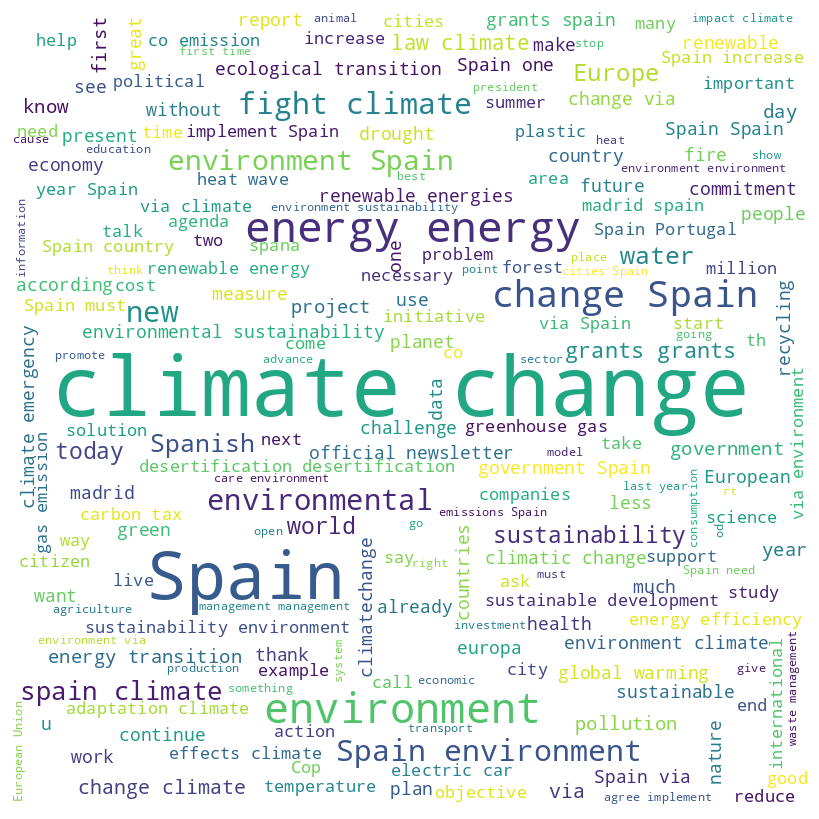

In [ ]:
# Graficamos la WordCloud
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
Tweets_df_General_completo_etiquetado.shape

(30530, 15)

### Primeras 20 palabras más frecuentes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Suponiendo que Tweets_df_General_completo_etiquetado es el DataFrame y 'texto_limpio' es la columna
texto = Tweets_df_General_completo_etiquetado['Texto_Limpio']

# Crear la matriz de términos del documento con CountVectorizer
vectorizer = CountVectorizer().fit(texto)
bag_of_words = vectorizer.transform(texto)

# Obtén las 20 palabras más comunes
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = [word for word, freq in words_freq[:20]]

# Crear la nueva columna
Tweets_df_General_completo_etiquetado['palabras_frecuentes'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].apply(lambda x: 'SI' if any(word in x.split() for word in common_words) else 'NO')


Primero, este código crea una matriz de términos del documento utilizando CountVectorizer que nos permite extraer las palabras y su frecuencia en el texto. Luego obtiene las 20 palabras más frecuentes en el texto. Finalmente, crea una nueva columna 'categorica' que es 'SI' si el tweet contiene alguna de las 20 palabras más comunes y 'NO' si no.

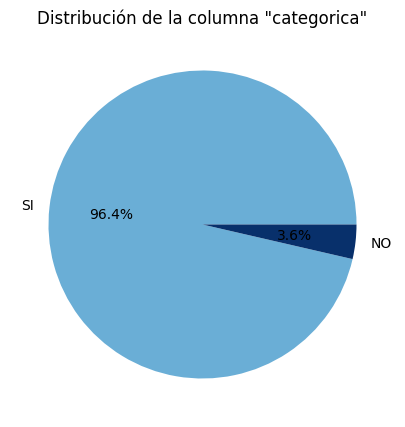

In [ ]:
# Suponiendo que 'categorica' es tu columna con las clases 'SI' o 'NO'
conteos = Tweets_df_General_completo_etiquetado['palabras_frecuentes'].value_counts()

# Crear una paleta de colores azules
colores = plt.cm.Blues(np.linspace(0.5, 1, len(conteos)))

# Crear el gráfico de tarta
plt.figure(figsize=(10, 5))
plt.pie(conteos, labels = conteos.index, colors=colores, autopct='%1.1f%%')

plt.title('Distribución de la columna "categorica"')
plt.show()


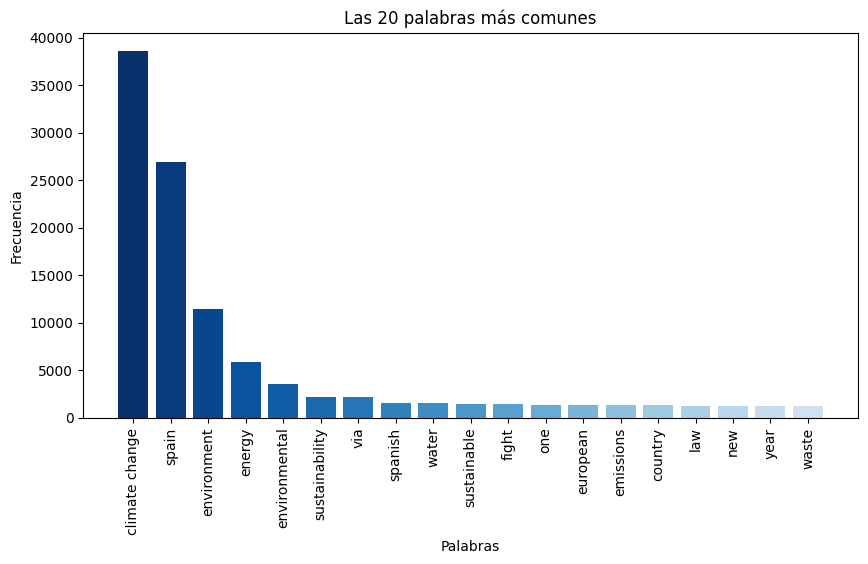

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usamos el mismo proceso que antes para obtener las 20 palabras más comunes
vectorizer = CountVectorizer().fit(Tweets_df_General_completo_etiquetado['Texto_Limpio'])
bag_of_words = vectorizer.transform(Tweets_df_General_completo_etiquetado['Texto_Limpio'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = words_freq[:20]

# Separamos las palabras y sus frecuencias en dos listas
words = [word for word, freq in common_words]
freqs = [freq for word, freq in common_words]

# Combinar las palabras en las posiciones 2 y 3 en una sola, y sumar sus frecuencias
words[1] = words[1] + ' ' + words[2]
freqs[1] = freqs[1] + freqs[2]

# Eliminar la tercera palabra y su frecuencia, ya que ahora están incluidas en la segunda
del words[2]
del freqs[2]

# Intercambiar la posición de la nueva palabra (posición 2) con la de la primera posición
words[0], words[1] = words[1], words[0]
freqs[0], freqs[1] = freqs[1], freqs[0]

# Creamos el gráfico
plt.figure(figsize=(10, 5))  # Tamaño del gráfico

# Creamos una escala de colores desde el azul claro (mínimo) hasta el azul oscuro (máximo)
colors = plt.cm.Blues(np.linspace(0.2, 1, len(words)))[::-1]

plt.bar(words, freqs, color=colors)
plt.title('Las 20 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotamos los nombres en el eje x para que sean legibles
plt.show()


### 20 palabras más frecuentes eliminando los topics (Cambio climatico, Medioambiente y España)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Suponiendo que Tweets_df_General_completo_etiquetado es el DataFrame y 'Texto_Limpio' es la columna
texto = Tweets_df_General_completo_etiquetado['Texto_Limpio']

# Crear la matriz de términos del documento con CountVectorizer
vectorizer = CountVectorizer().fit(texto)
bag_of_words = vectorizer.transform(texto)

# Obtén las 20 palabras más comunes DESPUÉS de las 3 primeras
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Aquí es donde cambiamos el índice del slice para saltarnos las 3 primeras palabras
common_words = [word for word, freq in words_freq[2:22]]

# Crear la nueva columna
Tweets_df_General_completo_etiquetado['palabras_frecuentes'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].apply(lambda x: 'SI' if any(word in x.split() for word in common_words) else 'NO')


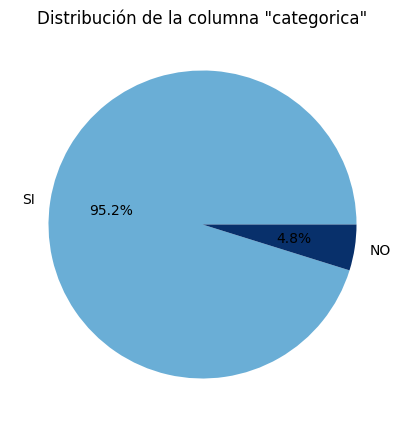

In [ ]:
# Suponiendo que 'categorica' es tu columna con las clases 'SI' o 'NO'
conteos = Tweets_df_General_completo_etiquetado['palabras_frecuentes'].value_counts()

# Crear una paleta de colores azules
colores = plt.cm.Blues(np.linspace(0.5, 1, len(conteos)))

# Crear el gráfico de tarta
plt.figure(figsize=(10, 5))
plt.pie(conteos, labels = conteos.index, colors=colores, autopct='%1.1f%%')

plt.title('Distribución de la columna "categorica"')
plt.show()


### 50 PALABRAS MÁS FRECUENTS Y CREAMOS LA VARIABLE CON LAS PALABRAS CONTENIDAS EN EL TWEET




In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Suponiendo que Tweets_df_General_completo_etiquetado es el DataFrame y 'Texto_Limpio' es la columna
texto = Tweets_df_General_completo_etiquetado['Texto_Limpio']

# Crear la matriz de términos del documento con CountVectorizer
vectorizer = CountVectorizer().fit(texto)
bag_of_words = vectorizer.transform(texto)

# Obtén las 50 palabras más comunes
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = [word for word, freq in words_freq[:50]]

# Crear la nueva columna
Tweets_df_General_completo_etiquetado['palabra_frecuente'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].apply(lambda x: next((word for word in common_words if word in x.split()), 'NO'))


In [ ]:
Tweets_df_General_completo_etiquetado.head(1)

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,palabra_frecuente
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,climatechange


### 50 PALABRAS MÁS FRECUENTES (sin contar las 3 primeras) Y CREAMOS LA VARIABLE CON LAS PALABRAS CONTENIDAS EN EL TWEET


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np

# Suponiendo que Tweets_df_General_completo_etiquetado es el DataFrame y 'Texto_Limpio' es la columna
texto = Tweets_df_General_completo_etiquetado['Texto_Limpio']

# Crear la matriz de términos del documento con CountVectorizer
vectorizer = CountVectorizer().fit(texto)
bag_of_words = vectorizer.transform(texto)

# Obtén las 50 palabras más comunes DESPUÉS de las 3 primeras
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = [word for word, freq in words_freq[3:53]] # Ignora las 3 primeras palabras y toma las siguientes 50

# Crear la nueva columna
def most_common_in_tweet(tweet):
    words_in_tweet = set(tweet.split()) & set(common_words)
    if not words_in_tweet:
        return np.nan
    words_count = [(word, tweet.split().count(word)) for word in words_in_tweet]
    most_common_word = max(words_count, key=lambda x: x[1])[0]
    return most_common_word

Tweets_df_General_completo_etiquetado['palabra_frecuente'] = Tweets_df_General_completo_etiquetado['Texto_Limpio'].apply(most_common_in_tweet)


In [ ]:
Tweets_df_General_completo_etiquetado.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,palabra_frecuente
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,climatechange
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"['climate', 'change', 'causes', 'frequent', 'i...","['climat', 'chang', 'caus', 'frequent', 'inten...",112,climate change causes frequent intense periods...,negative,SI,NaN
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral,SI,environmental
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral,SI,law
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,climatechange


In [ ]:
Tweets_df_General_completo_etiquetado.to_csv('Tweets_df_General_completo_etiquetado_50_palabrasfrec.csv', index=False)


#------------------------------------------------



#- ------------------------------------------------

## Analisisi Apriori

Matriz de correlación


In [ ]:
# Convertir la columna 'Datetime' a un formato de fecha y hora
Tweets_df_General_completo['Datetime'] = pd.to_datetime(Tweets_df_General_completo['Datetime'])

# Extraer la hora del día de 'Datetime'
Tweets_df_General_completo['hour_of_day'] = Tweets_df_General_completo['Datetime'].dt.hour


In [ ]:
Tweets_df_General_completo

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,hour_of_day
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,20
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"['climate', 'change', 'causes', 'frequent', 'i...","['climat', 'chang', 'caus', 'frequent', 'inten...",112,climate change causes frequent intense periods...,negative,SI,18
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral,SI,14
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral,SI,10
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,2022-01-01 22:58:11,the Spanish environment will be defended in Eu...,pepe_martin_,3269.0,Alicante,1.0,6.0,7.0,pepe_martin__c69224b5,[],"['Spanish', 'environment', 'defended', 'Europe...","['spanish', 'environ', 'defend', 'europ', 'min...",240,Spanish environment defended Europe minister g...,neutral,SI,22
30526,2022-01-01 21:31:20,spain receives the new year with Aprils own te...,carlosgarciapan,655.0,Argentina,0.0,0.0,0.0,carlosgarciapan_a6f1d7b0,[],"['spain', 'receives', 'new', 'year', 'Aprils',...","['spain', 'receiv', 'new', 'year', 'april', 't...",120,spain receives new year Aprils temperatures go...,positive,SI,21
30527,2022-01-01 13:23:37,beach day to January so that the garbage of ...,JoseCardenosa,1507.0,"Islas Canarias, España",1.0,0.0,2.0,JoseCardenosa_a50696e8,[],"['beach', 'day', 'January', 'garbage', 'vox', ...","['beach', 'day', 'januari', 'garbag', 'vox', '...",164,beach day January garbage vox denies climate c...,negative,SI,13
30528,2022-01-01 13:23:00,what good business have been set up with this ...,PerroOrwelliano,15.0,Eurasia,1.0,0.0,0.0,PerroOrwelliano_89cea926,[],"['good', 'business', 'set', 'central', 'madrid...","['good', 'busi', 'set', 'central', 'madrid', '...",241,good business set central madrid central distr...,neutral,SI,13


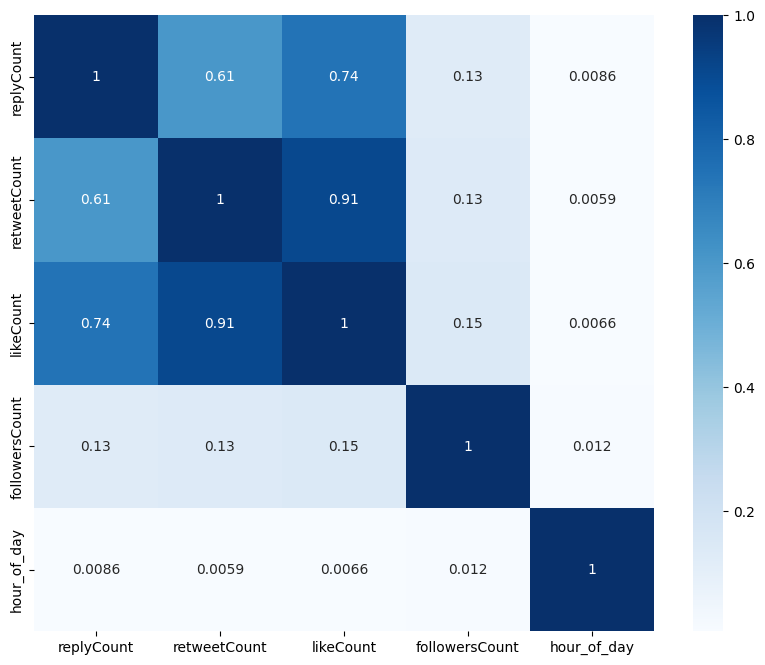

In [ ]:

# Convertir la columna 'Datetime' a un formato de fecha y hora
Tweets_df_General_completo['Datetime'] = pd.to_datetime(Tweets_df_General_completo['Datetime'])

# Extraer la hora del día de 'Datetime'
Tweets_df_General_completo['hour_of_day'] = Tweets_df_General_completo['Datetime'].dt.hour

# Seleccionar las columnas de interés
selected_columns = Tweets_df_General_completo[['replyCount', 'retweetCount', 'likeCount', 'followersCount', 'hour_of_day']]

# Calcular la matriz de correlación
corr_matrix = selected_columns.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()


#------------------------------------------------



#- ------------------------------------------------

# Análisis de sentimiento para cada uno de los Tweets(Etiquetamos)
Durante este proceso de etiquetado se han extraido una muestra de 1000 tweets en la cual se le aplica un modelo Zero-Shot supervisado por un humano en este caso yo, mediante el cual se comprobará la precisión de los diferentes modelos de análisis de sentimiento. Siendo el modelo con mayor precisión el elegido para etiquetar todos los tweets de la base de datos en cuestión.

## Para ello vamos a aplicar las siguientes técnicas de análisis de sentimiento.



*   Zero-Shot Classification
*   Modelo de Hugging Face especializado en análisis de sentimiento de Tweets.
*   Modelo de Hugging Face especializado en análisis de sentimiento.
*   Liberia Preentrenada Vader



### Extraemos las primeras 500 filas del dataframe y observamos que concuerda el resultado

In [ ]:
url = "/content/primeros_500_tweets_2017.xlsx"
primeros_tweets = pd.read_excel(url)

primeros_tweets = primeros_tweets.head(500)

#  Zero Shot Classification


## facebook/bart-large-mnli

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Clasificar cada tweet en el DataFrame
candidate_labels = ['positivo', 'negativo', 'neutro']
primeros_1000_tweets['Sentimiento_Zero_Shot'] = primeros_1000_tweets['Texto_Limpio'].apply(lambda x: classifier(x, candidate_labels)[0]['labels'][0])

NameError: ignored

In [ ]:
# Cargar el clasificador "zero-shot"
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Clasificar cada tweet en el DataFrame
candidate_labels = ['positivo', 'negativo', 'neutro']
predictions = primeros_1000_tweets['Texto_Limpio'].apply(lambda x: classifier(x, candidate_labels))

primeros_1000_tweets['Sentimiento_Zero_Shot'] = predictions.apply(lambda x: x['labels'][0] if 'labels' in x else None)


In [ ]:
primeros_1000_tweets.to_csv('/content/primeros_1000_tweets_2017_mejor.csv', index=False)

In [ ]:
primeros_1000_tweets.head()

,Datetime,Tweet Id,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,emojis,tokens,lemmas,Texto_Limpio,Sentimiento_Zero_Shot,Sentimiento_XLM_ROBERTA_BASE,Puntaje_XLM_ROBERTA_BASE
0,2017-12-30 20:04:34+00:00,"9,47197E+17",The houses with marine containers in Spain inc...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,[],"['houses', 'marine', 'containers', 'Spain', 'i...","['hous', 'marin', 'contain', 'spain', 'increas...",houses marine containers Spain increase demand...,neutro,neutro,0.591668
1,2017-12-30 18:30:25+00:00,"9,47173E+17",Climatic change causes more frequent and inten...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,['ð¥ð¥'],"['Climatic', 'change', 'causes', 'frequent', '...","['climat', 'chang', 'caus', 'frequent', 'inten...",Climatic change causes frequent intense drough...,negativo,negativo,0.873005
2,2017-12-30 14:52:00+00:00,"9,47118E+17",Climate Change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,[],"['Climate', 'Change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",Climate Change Iceland shines environmental te...,positivo,positivo,0.511432
3,2017-12-30 10:25:24+00:00,"9,47051E+17",We can modernize Spain by fighting Climate Cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,[],"['modernize', 'Spain', 'fighting', 'Climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",modernize Spain fighting Climate Change Electr...,neutro,neutro,0.508522
4,2017-12-29 18:52:46+00:00,"9,46816E+17",Unfortunately Don AndrÃ©s in Spain as opposed ...,OscarDS,48263.0,"Irun, Madrid ð",0.0,0.0,1.0,[],"['Unfortunately', 'AndrÃ©s', 'Spain', 'opposed...","['unfortun', 'andrÃ©', 'spain', 'oppos', 'port...",Unfortunately AndrÃ©s Spain opposed Portugal g...,negativo,negativo,0.880988


In [ ]:
#Leemos la base de datos
primeros_1000_tweets = pd.read_csv('/content/primeros_1000_tweets_2017_mej.csv', encoding='latin-1', delimiter=';')

In [ ]:
primeros_1000_tweets.head()

## Modelo de Hugging Face especializado en análisis de sentimiento de Tweets.

#### cardiffnlp/twitter-xlm-roberta-base-sentiment





---



In [ ]:
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
# Elimina filas con valores NaN en la columna 'lemmas'
primeros_1000_tweets = primeros_1000_tweets.dropna(subset=['Sentimiento_Zero_Shot'])


In [ ]:
all(isinstance(item, str) for item in primeros_1000_tweets['Sentimiento_Zero_Shot'])

True

In [ ]:
sentiment_results = primeros_1000_tweets['Texto_Limpio'].apply(lambda x: classifier(x))

In [ ]:
#primeros_1000_tweets['Sentimiento_Zero_Shot'].shape
#primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'].shape
primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'].shape

(998,)

In [ ]:
primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'] = sentiment_results.apply(lambda x: x[0]['label'])


In [ ]:
primeros_1000_tweets.head(20)

,Datetime,Tweet Id,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,emojis,tokens,lemmas,Texto_Limpio,Sentimiento_Zero_Shot,Sentimiento_XLM_ROBERTA_BASE,Sentimiento_distilbert,Sentimiento_Vader,Sentimiento_textblob
0,2017-12-30 20:04:34+00:00,"9,47197E+17",The houses with marine containers in Spain inc...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,[],"['houses', 'marine', 'containers', 'Spain', 'i...","['hous', 'marin', 'contain', 'spain', 'increas...",houses marine containers Spain increase demand...,neutro,neutral,NaN,positivo,neutro
1,2017-12-30 18:30:25+00:00,"9,47173E+17",Climatic change causes more frequent and inten...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,['ð¥ð¥'],"['Climatic', 'change', 'causes', 'frequent', '...","['climat', 'chang', 'caus', 'frequent', 'inten...",Climatic change causes frequent intense drough...,negativo,negative,NaN,negativo,positivo
2,2017-12-30 14:52:00+00:00,"9,47118E+17",Climate Change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,[],"['Climate', 'Change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",Climate Change Iceland shines environmental te...,positivo,positive,NaN,negativo,neutro
3,2017-12-30 10:25:24+00:00,"9,47051E+17",We can modernize Spain by fighting Climate Cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,[],"['modernize', 'Spain', 'fighting', 'Climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",modernize Spain fighting Climate Change Electr...,neutro,neutral,NaN,negativo,neutro
4,2017-12-29 18:52:46+00:00,"9,46816E+17",Unfortunately Don AndrÃ©s in Spain as opposed ...,OscarDS,48263.0,"Irun, Madrid ð",0.0,0.0,1.0,[],"['Unfortunately', 'AndrÃ©s', 'Spain', 'opposed...","['unfortun', 'andrÃ©', 'spain', 'oppos', 'port...",Unfortunately AndrÃ©s Spain opposed Portugal g...,negativo,negative,NaN,negativo,negativo
5,2017-12-29 16:55:23+00:00,"9,46787E+17",Fight against Climate ChangeOxfam estimates th...,OIenAlicante,1584.0,"Alicante, EspaÃ±a",0.0,1.0,0.0,[],"['Fight', 'Climate', 'ChangeOxfam', 'estimates...","['fight', 'climat', 'changeoxfam', 'estim', 'w...",Fight Climate ChangeOxfam estimates weight wor...,neutro,neutral,NaN,negativo,negativo
6,2017-12-29 16:43:14+00:00,"9,46784E+17",The campaign to warn about the environmental c...,emeterina,1997.0,NaN,0.0,4.0,2.0,[],"['campaign', 'warn', 'environmental', 'consequ...","['campaign', 'warn', 'environment', 'consequ',...",campaign warn environmental consequences use w...,negativo,negative,NaN,negativo,negativo
7,2017-12-29 15:30:31+00:00,"9,46765E+17",The one in Spain is at risk of becoming desert...,ciudadelfuturo,66958.0,EspaÃ±a,0.0,3.0,9.0,['ð'],"['one', 'Spain', 'risk', 'becoming', 'desert',...","['one', 'spain', 'risk', 'becom', 'desert', 't...",one Spain risk becoming desert temperature con...,negativo,negative,NaN,negativo,positivo
8,2017-12-29 13:22:49+00:00,"9,46733E+17",the year of the new climate reality in SpainWe...,AsunSEO,7864.0,NaN,1.0,54.0,59.0,[],"['year', 'new', 'climate', 'reality', 'SpainWe...","['year', 'new', 'climat', 'realiti', 'spainw',...",year new climate reality SpainWe robbed fallAb...,negativo,negative,NaN,neutro,positivo
9,2017-12-29 11:40:56+00:00,"9,46708E+17",year in which plastic bags disappear we protec...,kikepop71,87.0,NaN,0.0,0.0,0.0,[],"['year', 'plastic', 'bags', 'disappear', 'prot...","['year', 'plastic', 'bag', 'disappear', 'prote...",year plastic bags disappear protect environmen...,positivo,neutral,NaN,positivo,neutro


In [ ]:
primeros_1000_tweets = primeros_1000_tweets.drop(['Puntaje_XLM_ROBERTA_BASE'], axis=1)

In [ ]:
primeros_1000_tweets.to_csv('primeros_1000_tweets_2017_mejor.csv', index=False)

## Modelo de Hugging Face especializado en análisis de sentimiento.

yiyanghkust/finbert-tone


In [ ]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')


In [ ]:
def obtener_sentimiento(tweet):
    try:
        return nlp([tweet])[0]['label']
    except ValueError as e:
        raise ValueError(f"Error en la fila: {tweet}") from e

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

for i, tweet in enumerate(primeros_1000_tweets["Texto_Limpio"]):
    try:
        primeros_1000_tweets.loc[i, "Sentimiento_distilbert"] = obtener_sentimiento(tweet)
    except ValueError as e:
        print("Error en la fila:", i)
        print("Mensaje de error:", e)


In [ ]:
mapeo_sentimientos = {"positive": "positivo", "negative": "negativo", "neutral": "neutro"}

# Aplicar el mapeo a los resultados del análisis de sentimiento

primeros_1000_tweets["Sentimiento_XLM_ROBERTA_BASE"] = primeros_1000_tweets["Sentimiento_XLM_ROBERTA_BASE"].map(mapeo_sentimientos)

In [ ]:
mapeo_sentimientos = {"Positive": "positivo", "Negative": "negativo", "Neutral": "neutro"}

primeros_1000_tweets["Sentimiento_distilbert"] = primeros_1000_tweets["Sentimiento_distilbert"].map(mapeo_sentimientos)

In [ ]:
primeros_1000_tweets.head()

,Datetime,Tweet Id,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,emojis,tokens,lemmas,Texto_Limpio,Sentimiento_Zero_Shot,Sentimiento_XLM_ROBERTA_BASE,Sentimiento_distilbert,Sentimiento_Vader,Sentimiento_textblob
0,2017-12-30 20:04:34+00:00,"9,47197E+17",The houses with marine containers in Spain inc...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,[],"['houses', 'marine', 'containers', 'Spain', 'i...","['hous', 'marin', 'contain', 'spain', 'increas...",houses marine containers Spain increase demand...,neutro,neutro,positivo,positivo,neutro
1,2017-12-30 18:30:25+00:00,"9,47173E+17",Climatic change causes more frequent and inten...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,['ð¥ð¥'],"['Climatic', 'change', 'causes', 'frequent', '...","['climat', 'chang', 'caus', 'frequent', 'inten...",Climatic change causes frequent intense drough...,negativo,negativo,negativo,negativo,positivo
2,2017-12-30 14:52:00+00:00,"9,47118E+17",Climate Change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,[],"['Climate', 'Change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",Climate Change Iceland shines environmental te...,positivo,positivo,neutro,negativo,neutro
3,2017-12-30 10:25:24+00:00,"9,47051E+17",We can modernize Spain by fighting Climate Cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,[],"['modernize', 'Spain', 'fighting', 'Climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",modernize Spain fighting Climate Change Electr...,neutro,neutro,neutro,negativo,neutro
4,2017-12-29 18:52:46+00:00,"9,46816E+17",Unfortunately Don AndrÃ©s in Spain as opposed ...,OscarDS,48263.0,"Irun, Madrid ð",0.0,0.0,1.0,[],"['Unfortunately', 'AndrÃ©s', 'Spain', 'opposed...","['unfortun', 'andrÃ©', 'spain', 'oppos', 'port...",Unfortunately AndrÃ©s Spain opposed Portugal g...,negativo,negativo,neutro,negativo,negativo


In [ ]:
# Elimina filas con valores NaN en la columna 'lemmas'
primeros_1000_tweets = primeros_1000_tweets.dropna(subset=['Sentimiento_textblob'])
all(isinstance(item, str) for item in primeros_1000_tweets['Sentimiento_textblob'])

True

In [ ]:
primeros_1000_tweets['Sentimiento_textblob'].shape

(995,)

In [ ]:
primeros_1000_tweets.to_csv('primeros_1000_tweets_final.csv', index=False)

# VADER

In [ ]:
# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento de un texto
def obtener_sentimiento(texto):
    scores = sia.polarity_scores(texto)
    sentimiento_compound = scores['compound']

    if sentimiento_compound >= 0.05:
        return 'positivo'
    elif sentimiento_compound <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar el análisis de sentimiento a los tweets
primeros_1000_tweets['Sentimiento_Vader'] = primeros_1000_tweets['Texto_Limpio'].apply(obtener_sentimiento)



# Textbloob

In [ ]:
def obtener_sentimiento(tweet):
    sentimiento = TextBlob(tweet).sentiment.polarity
    if sentimiento > 0:
        return "positivo"
    elif sentimiento < 0:
        return "negativo"
    else:
        return "neutro"

# Aplicar el análisis de sentimiento a cada tweet en el DataFrame
primeros_1000_tweets["Sentimiento_textblob"] = primeros_1000_tweets["Texto_Limpio"].apply(obtener_sentimiento)


# NLTK

In [ ]:
def obtener_sentimiento(tweet):
    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(tweet)["compound"]
    if sentimiento > 0:
        return "positivo"
    elif sentimiento < 0:
        return "negativo"
    else:
        return "neutro"

# Aplicar el análisis de sentimiento a cada tweet en el DataFrame
primeros_1000_tweets["Sentimiento_nltk"] = primeros_1000_tweets["Texto_Limpio"].apply(obtener_sentimiento)


# Elección del mejor modelo empleando una muestra de 500 tweets:

#Calculo de la precisión de los modelos.

https://eprints.ucm.es/id/eprint/67203/1/Comparativa%20de%20te%CC%81cnicas%20de%20ana%CC%81lisis%20de%20sentimiento%20en%20contextos%20competitivos.pdf



---



*   Estudio de **Precisión** con respecto al etiquetado realizado por mi
*   elección del modelo con mejor precisión

##Métodos aplicados:


*   Precisión (Accuracy)
*   Precisión por clase (Precision)
*   Exhaustividad (Recall)
*   Puntuación F1 (F1-score)
*   Matriz de confusión
*   Kappa



In [ ]:
#Leemos la base de datos
primeros_1000_tweets = pd.read_csv('/content/primeros_1000_tweets_final.csv')

## Accuracy Score
----------

In [ ]:
# Calcula la precisión para cada modelo
accuracy_xlm_roberta = accuracy_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'])
accuracy_vader = accuracy_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader'])
accuracy_textblob = accuracy_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob'])
accuracy_distilbert = accuracy_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert'])


# Imprime los resultados
print("Precisión del modelo XLM-RoBERTa:", accuracy_xlm_roberta)
print("Precisión del modelo DistilBERT:", accuracy_distilbert)
print("Precisión del modelo Vader:", accuracy_vader)
print("Precisión del modelo TextBlob:", accuracy_textblob)


Precisión del modelo XLM-RoBERTa: 0.7226130653266332
Precisión del modelo DistilBERT: 0.5125628140703518
Precisión del modelo Vader: 0.507537688442211
Precisión del modelo TextBlob: 0.44221105527638194


Calculamos la precisión de cada modelo en comparación con la columna "Sentimiento_Zero_Shot" y se muestran los resultados.

In [ ]:
# Calcula la precisión por clase para cada modelo
precision_class_xlm_roberta = precision_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'], average=None)
precision_class_distilbert = precision_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert'], average=None)
precision_class_vader = precision_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader'], average=None)
precision_class_textblob = precision_score(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob'], average=None)

# Imprime los resultados
print("Precisión por clase para el modelo XLM-RoBERTa:", precision_class_xlm_roberta)
print("Precisión por clase para el modelo DistilBERT:", precision_class_distilbert)
print("Precisión por clase para el modelo Vader:", precision_class_vader)
print("Precisión por clase para el modelo TextBlob:", precision_class_textblob)


Precisión por clase para el modelo XLM-RoBERTa: [0.87613293 0.62171629 0.79569892]
Precisión por clase para el modelo DistilBERT: [0.85123967 0.45876289 0.52040816]
Precisión por clase para el modelo Vader: [0.68918919 0.50555556 0.35103245]
Precisión por clase para el modelo TextBlob: [0.61616162 0.46125461 0.26666667]


Este código calculará la precisión por clase para cada modelo en comparación con la columna "Sentimiento_Zero_Shot" y mostrará los resultados en la consola. Tener en cuenta que el parámetro average=None se utiliza para calcular la precisión por clase individualmente.

## Clasification_Report
----------

In [ ]:
# Muestra el informe de clasificación para cada modelo
print("Informe de clasificación para el modelo XLM-RoBERTa:")
print(classification_report(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE']))

print("Informe de clasificación para el modelo DistilBERT:")
print(classification_report(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert']))

print("Informe de clasificación para el modelo Vader:")
print(classification_report(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader']))

print("Informe de clasificación para el modelo TextBlob:")
print(classification_report(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob']))



Informe de clasificación para el modelo XLM-RoBERTa:
              precision    recall  f1-score   support

    negativo       0.88      0.70      0.78       415
      neutro       0.62      0.89      0.73       397
    positivo       0.80      0.40      0.54       183

    accuracy                           0.72       995
   macro avg       0.76      0.67      0.68       995
weighted avg       0.76      0.72      0.72       995

Informe de clasificación para el modelo DistilBERT:
              precision    recall  f1-score   support

    negativo       0.85      0.25      0.38       415
      neutro       0.46      0.90      0.61       397
    positivo       0.52      0.28      0.36       183

    accuracy                           0.51       995
   macro avg       0.61      0.47      0.45       995
weighted avg       0.63      0.51      0.47       995

Informe de clasificación para el modelo Vader:
              precision    recall  f1-score   support

    negativo       0.69      0.

Este código mostrará el informe de clasificación para cada modelo en comparación con la columna "Sentimiento_Zero_Shot". La función classification_report generará un informe con precision, recall, f1-score y support para cada etiqueta/clase.

995

## Matriz de Confusión
----------

In [ ]:
print(primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'].value_counts())
print(primeros_1000_tweets['Sentimiento_distilbert'].value_counts())


neutro      571
negativo    331
positivo     93
Name: Sentimiento_XLM_ROBERTA_BASE, dtype: int64
neutro      776
negativo    121
positivo     98
Name: Sentimiento_distilbert, dtype: int64


In [ ]:
# Calcula y muestra la matriz de confusión para cada modelo
print("Matriz de confusión para el modelo XLM-RoBERTa:")
print(confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE']))
print('/n')
# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
print(cm1_normalized)

print('/n')

print("Matriz de confusión para el modelo DistilBERT:")
print(confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert']))
print('/n')
# Calcular la matriz de confusión
cm2 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert'])

# Normalizar la matriz de confusión para obtener porcentajes
cm2_normalized = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
print(cm2_normalized)
print('/n')


print("Matriz de confusión para el modelo Vader:")
print(confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader']))
# Calcular la matriz de confusión
print('/n')
cm3 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader'])

# Normalizar la matriz de confusión para obtener porcentajes
cm3_normalized = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]
print(cm3_normalized)
print('/n')


print("Matriz de confusión para el modelo TextBlob:")
print(confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob']))
# Calcular la matriz de confusión
print('/n')
cm4 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob'])

# Normalizar la matriz de confusión para obtener porcentajes
cm4_normalized = cm4.astype('float') / cm4.sum(axis=1)[:, np.newaxis]
print(cm4_normalized)


Matriz de confusión para el modelo XLM-RoBERTa:
[[290 119   6]
 [ 29 355  13]
 [ 12  97  74]]
/n
[[0.69879518 0.28674699 0.01445783]
 [0.07304786 0.89420655 0.03274559]
 [0.06557377 0.53005464 0.40437158]]
/n
Matriz de confusión para el modelo DistilBERT:
[[103 295  17]
 [ 11 356  30]
 [  7 125  51]]
/n
[[0.24819277 0.71084337 0.04096386]
 [0.02770781 0.89672544 0.07556675]
 [0.03825137 0.68306011 0.27868852]]
/n
Matriz de confusión para el modelo Vader:
[[204 130  81]
 [ 76 182 139]
 [ 16  48 119]]
/n
[[0.49156627 0.31325301 0.19518072]
 [0.19143577 0.45843829 0.35012594]
 [0.08743169 0.26229508 0.65027322]]
/n
Matriz de confusión para el modelo TextBlob:
[[122 204  89]
 [ 49 250  98]
 [ 27  88  68]]
/n
[[0.2939759  0.49156627 0.21445783]
 [0.12342569 0.62972292 0.24685139]
 [0.14754098 0.48087432 0.3715847 ]]


primera matriz:


0.69879518: Proporción de tweets que eran 'negativo' y el modelo predijo correctamente como 'negativo'.
0.28674699: Proporción de tweets que eran 'negativo', pero el modelo predijo incorrectamente como 'neutro'.
0.01445783: Proporción de tweets que eran 'negativo', pero el modelo predijo incorrectamente como 'positivo'.
0.07304786: Proporción de tweets que eran 'neutro', pero el modelo predijo incorrectamente como 'negativo'.
0.89420655: Proporción de tweets que eran 'neutro' y el modelo predijo correctamente como 'neutro'.
0.03274559: Proporción de tweets que eran 'neutro', pero el modelo predijo incorrectamente como 'positivo'.
0.06557377: Proporción de tweets que eran 'positivo', pero el modelo predijo incorrectamente como 'negativo'.
0.53005464: Proporción de tweets que eran 'positivo', pero el modelo predijo incorrectamente como 'neutro'.
0.40437158: Proporción de tweets que eran 'positivo' y el modelo predijo correctamente como 'positivo'.
Estos valores pueden ser útiles para ver cómo el modelo de clasificación está realizando predicciones, en particular cuántas predicciones está acertando y cómo se distribuyen los errores entre las diferentes clases.

In [ ]:
s

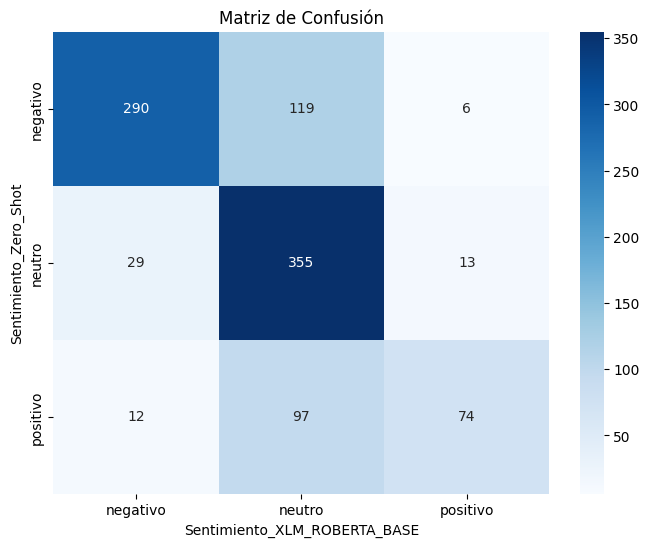

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'])

# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión')
plt.xlabel('Sentimiento_XLM_ROBERTA_BASE')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()


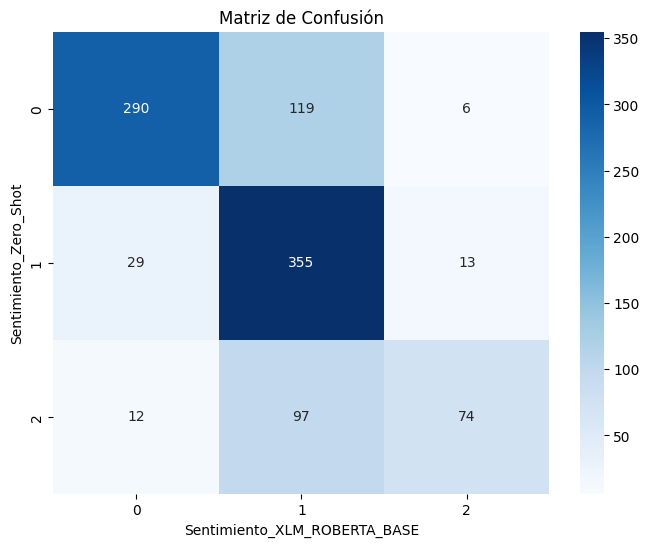

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'])

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Sentimiento_XLM_ROBERTA_BASE')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()



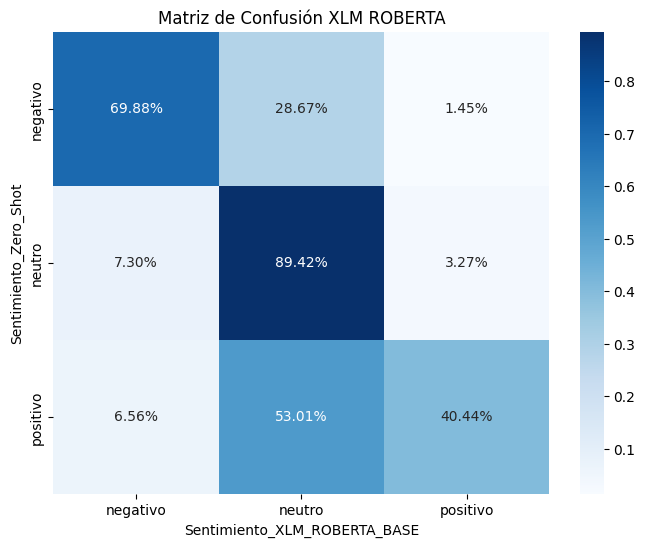

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión XLM ROBERTA')
plt.xlabel('Sentimiento_XLM_ROBERTA_BASE')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()




* En la primera fila (negativos), el modelo predijo correctamente el 69.88% de los casos negativos (verdaderos negativos), pero clasificó incorrectamente el 28.67% de los casos negativos como neutros (falsos neutros) y el 1.45% de los casos negativos como positivos (falsos positivos).

* En la segunda fila (neutros), el modelo predijo correctamente el 89.42% de los casos neutros (verdaderos neutros), pero clasificó incorrectamente el 7.30% de los casos neutros como negativos (falsos negativos) y el 3.27% de los casos neutros como positivos (falsos positivos).

* En la tercera fila (positivos), el modelo predijo correctamente el 40.44% de los casos positivos (verdaderos positivos), pero clasificó incorrectamente el 53.01% de los casos positivos como neutros (falsos neutros) y el 6.57% de los casos positivos como negativos (falsos positivos).

En este caso, se presenta un modelo con una alta precisión en el etiquetado de negativos y neutros, mientras que no presenta un gran acierto en las predicciones de los positivos, por lo tanto se clasifica este modelo como posible candidato potencial.




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_distilbert'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión Distilbert')
plt.xlabel('Sentimiento_distilbert')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()


NameError: ignored

[[0.24819277 0.71084337 0.04096386]

 [0.02770781 0.89672544 0.07556675]

 [0.03825137 0.68306011 0.27868852]]




 * En la primera fila (negativos), el modelo predijo correctamente el 24.82% de los casos negativos (verdaderos negativos), pero clasificó incorrectamente el 71.08% de los casos negativos como neutros (falsos neutros) y el 4.10% de los casos negativos como positivos (falsos positivos).

* En la segunda fila (neutros), el modelo predijo correctamente el 89.67% de los casos neutros (verdaderos neutros), pero clasificó incorrectamente el 2.77% de los casos neutros como negativos (falsos negativos) y el 7.56% de los casos neutros como positivos (falsos positivos).

* En la tercera fila (positivos), el modelo predijo correctamente el 27.87% de los casos positivos (verdaderos positivos), pero clasificó incorrectamente el 68.31% de los casos positivos como neutros (falsos neutros) y el 3.83% de los casos positivos como negativos (falsos positivos).

En este caso, se observa como el modelo predice la mayoría de tweets como neutros, lo que es un claro indicador de que es un modelo poco preciso y por lo tanto no es una buena opción para el etiquetado de la muestra final.

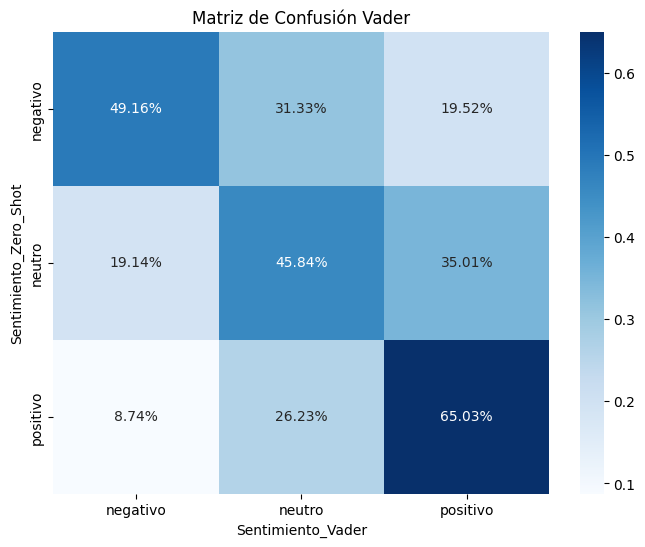

In [ ]:

# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión Vader')
plt.xlabel('Sentimiento_Vader')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()


* En la primera fila (negativos), el modelo predijo correctamente el 49.16% de los casos negativos (verdaderos negativos), pero clasificó incorrectamente el 31.33% de los casos negativos como neutros (falsos neutros) y el 19.52% de los casos negativos como positivos (falsos positivos).

* En la segunda fila (neutros), el modelo predijo correctamente el 45.84% de los casos neutros (verdaderos neutros), pero clasificó incorrectamente el 19.14% de los casos neutros como negativos (falsos negativos) y el 35.01% de los casos neutros como positivos (falsos positivos).

* En la tercera fila (positivos), el modelo predijo correctamente el 65.03% de los casos positivos (verdaderos positivos), pero clasificó incorrectamente el 8.74% de los casos positivos como negativos (falsos negativos) y el 26.23% de los casos positivos como neutros (falsos positivos).

En este caso, se presenta un modelo con un bajo acierto en la clasificación de las tres clases, por lo tanto, lo hace un modelo poco fiable para etiquetar la muestra completa.

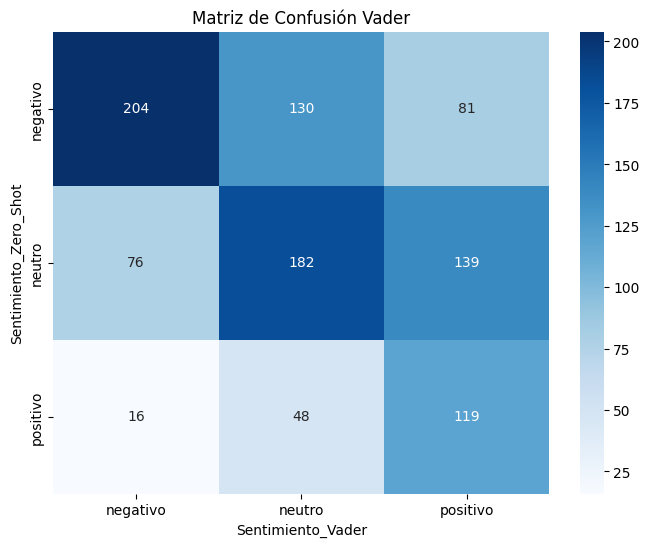

In [ ]:


# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_Vader'])
# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión Vader')
plt.xlabel('Sentimiento_Vader')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()

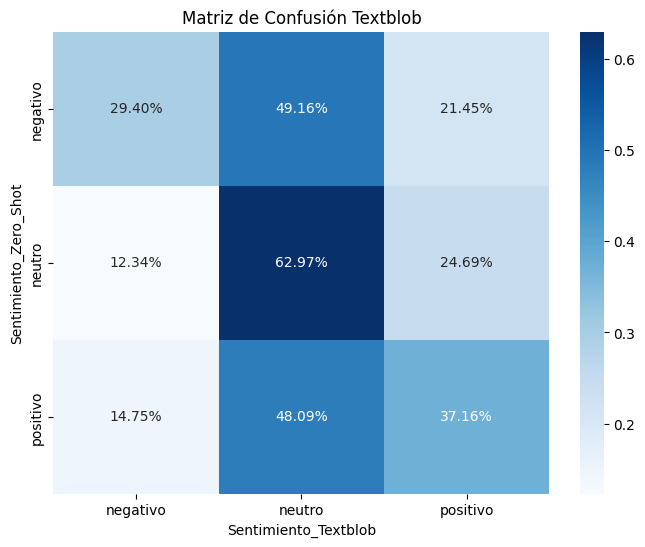

In [ ]:
Ç# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión Textblob')
plt.xlabel('Sentimiento_Textblob')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()


* En la primera fila (negativos), el modelo predijo correctamente el 29.40% de los casos negativos (verdaderos negativos), pero clasificó incorrectamente el 49.16% de los casos negativos como neutros (falsos neutros) y el 21.45% de los casos negativos como positivos (falsos positivos).

* En la segunda fila (neutros), el modelo predijo correctamente el 62.97% de los casos neutros (verdaderos neutros), pero clasificó incorrectamente el 12.34% de los casos neutros como negativos (falsos negativos) y el 24.69% de los casos neutros como positivos (falsos positivos).

* En la tercera fila (positivos), el modelo predijo correctamente el 37.16% de los casos positivos (verdaderos positivos), pero clasificó incorrectamente el 14.75% de los casos positivos como negativos (falsos negativos) y el 48.09% de los casos positivos como neutros (falsos positivos).

En este caso, igual que sucede con el modelo Distilbert se observa un modelo con cierta tendencia a etiquetar gran cantidad de los tweets de la muestra como neutros lo que nos hace considerar este modelo como poco eficaz para el etiquetado de la muestra global.

Matriz de confusión ploteada

## CLASIFICATION REPORT PLOTEADO

----------

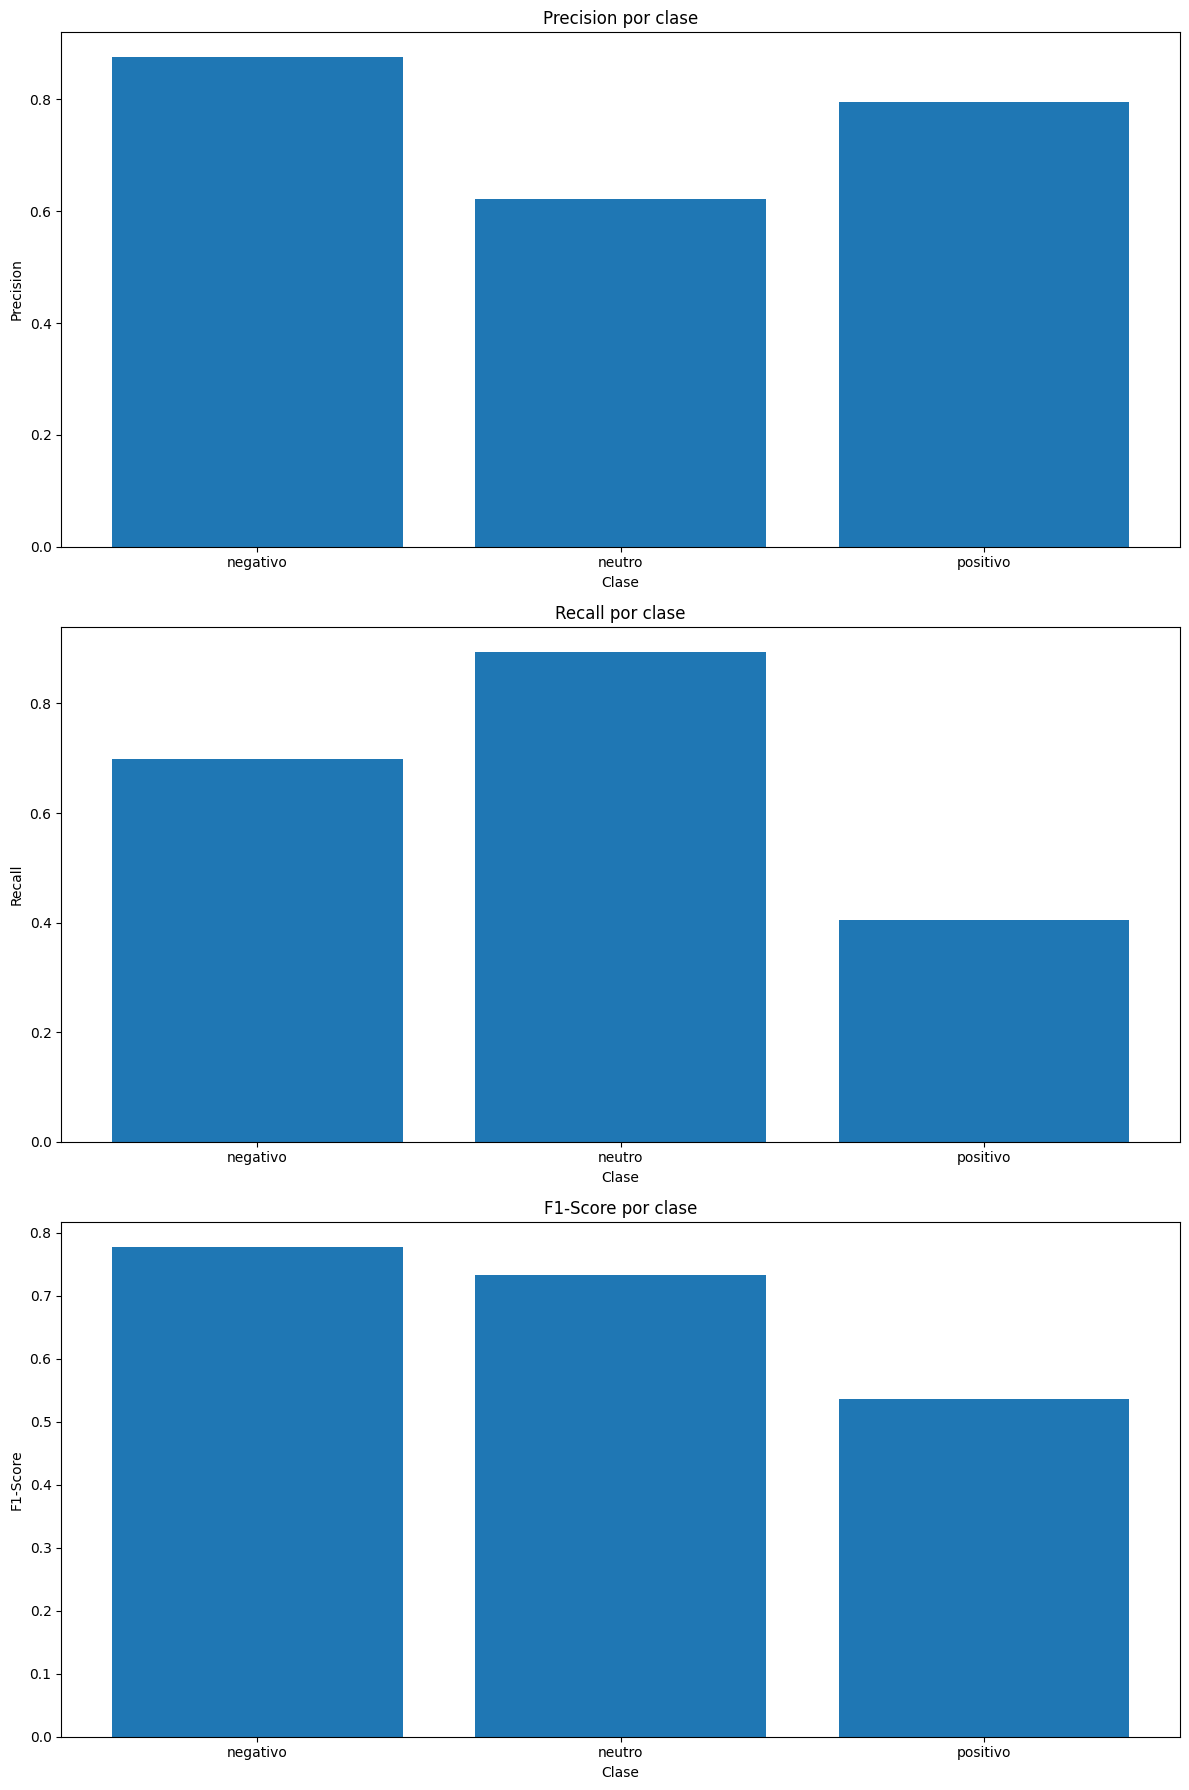

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Calcular el informe de clasificación
report = classification_report(primeros_1000_tweets['Sentimiento_Zero_Shot'],
                               primeros_1000_tweets['Sentimiento_XLM_ROBERTA_BASE'],
                               output_dict=True)

# Convertir a DataFrame
report_df = pd.DataFrame(report).transpose()

# Excluir la última fila que contiene 'accuracy', 'macro avg' y 'weighted avg'
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de barras para la precisión
axs[0].bar(report_df.index, report_df['precision'])
axs[0].set_title('Precision por clase')
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Precision')

# Gráfico de barras para el recall
axs[1].bar(report_df.index, report_df['recall'])
axs[1].set_title('Recall por clase')
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Recall')

# Gráfico de barras para el f1-score
axs[2].bar(report_df.index, report_df['f1-score'])
axs[2].set_title('F1-Score por clase')
axs[2].set_xlabel('Clase')
axs[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


Este código suma las matrices de confusión generadas por cada modelo y crea una matriz de confusión conjunta. Sin embargo, como mencioné anteriormente, ten en cuenta que si tienes muchos modelos y clases, la matriz de confusión conjunta puede volverse difícil de interpretar debido a su tamaño. En ese caso, puede ser más útil analizar las matrices de confusión por separado para cada modelo o utilizar otras métricas de evaluación más adecuadas para la comparación de múltiples modelos.

----
# Etiquetamos la muestra completa (generamos la columna target)
----

APLICAMOS EL MEJOR MODELO A TODA LA MUESTRA

In [ ]:
pip install xformers

In [ ]:
#Establecemos el clasificador
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

#Guardamos los resultados
sentiment_results = Tweets_df_General_completo['Texto_Limpio'].apply(lambda x: classifier(x))

#Aplicamos en el modelo
Tweets_df_General_completo['Target'] = sentiment_results.apply(lambda x: x[0]['label'])

In [ ]:
from google.colab import files

# Guardar el DataFrame en un archivo CSV
Tweets_df_General_completo.to_csv('Tweets_df_General_completo_etiquetado.csv', index=False)

# Descargar el archivo CSV
files.download('Tweets_df_General_completo_etiquetado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAtriz de confusión modelo final de etiquetado

In [ ]:
# Calcular la matriz de confusión
cm1 = confusion_matrix(primeros_1000_tweets['Sentimiento_Zero_Shot'], primeros_1000_tweets['Sentimiento_textblob'])

# Normalizar la matriz de confusión para obtener porcentajes
cm1_normalized = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
# Definir las etiquetas
etiquetas = ['negativo', 'neutro', 'positivo']  # Ajusta esto a tus etiquetas reales

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión Textblob')
plt.xlabel('Sentimiento_Textblob')
plt.ylabel('Sentimiento_Zero_Shot')
plt.show()


## Análisis exploratorio de los datos
Análisis exploratorio de datos (EDA): Realiza un análisis más profundo de los datos para obtener información relevante sobre las relaciones entre las variables. Esto puede implicar el cálculo de estadísticas descriptivas, la visualización de gráficos y la identificación de patrones o tendencias en los datos.


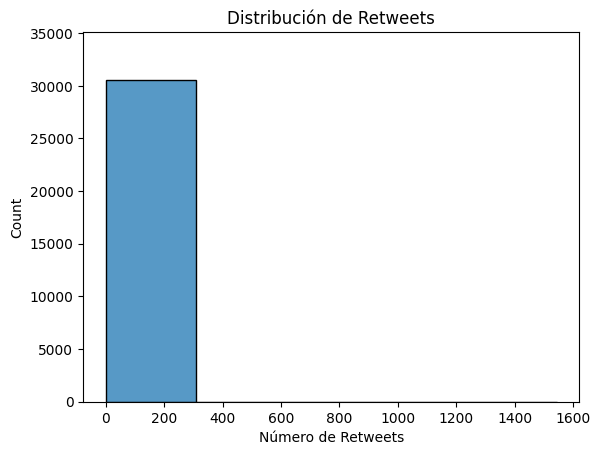

In [ ]:

# Visualizar la distribución de las variables numéricas
sns.histplot(Tweets_df_General_completo['retweetCount'], bins=5)
plt.title('Distribución de Retweets')
plt.xlabel('Número de Retweets')
plt.ylim(0, 35100)  # Limitar el eje y hasta 300
plt.show()


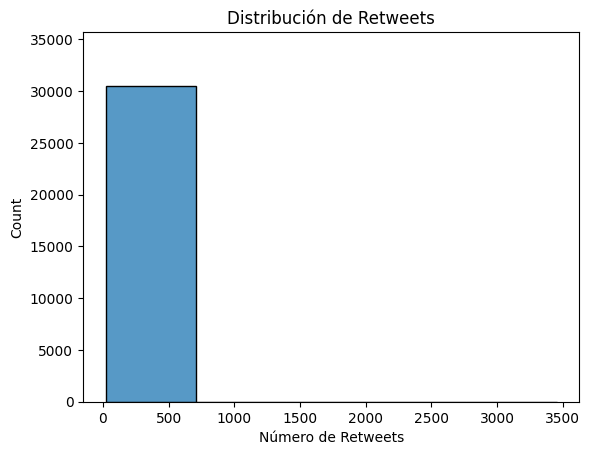

In [ ]:

# Visualizar la distribución de las variables numéricas
sns.histplot(Tweets_df_General_completo['Longitud_Tweet'], bins=5)
plt.title('Distribución de Retweets')
plt.xlabel('Número de Retweets')
plt.ylim(0, 35700)  # Limitar el eje y hasta 700
plt.show()


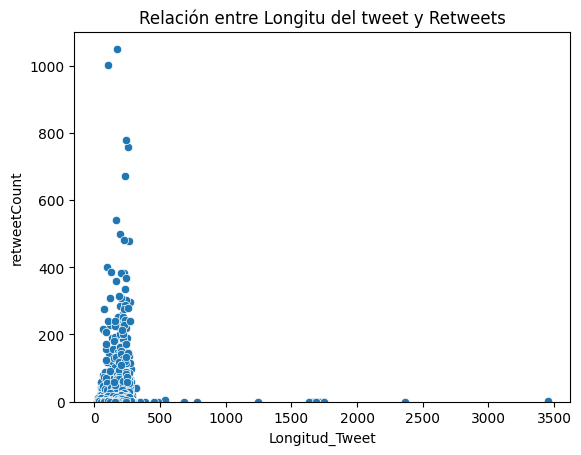

In [ ]:
# Visualizar la relación entre variables numéricas
sns.scatterplot(data=Tweets_df_General_completo, x='Longitud_Tweet', y='retweetCount')
plt.title('Relación entre Longitu del tweet y Retweets')
plt.ylim(0, 1100)  # Limitar el eje y hasta 300
plt.show()

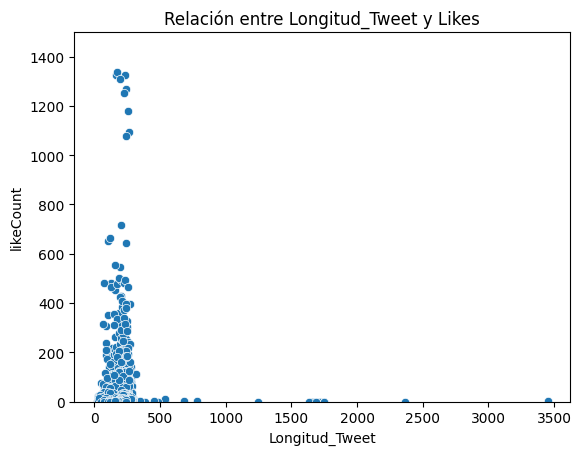

In [ ]:
# Visualizar la relación entre variables numéricas
sns.scatterplot(data=Tweets_df_General_completo, x='Longitud_Tweet', y='likeCount')
plt.title('Relación entre Longitud_Tweet y Likes')

plt.ylim(0, 1500)  # Limitar el eje y hasta 300
plt.show()

In [ ]:
Tweets_df_General_completo.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"[houses, marine, container, Spain, increase, d...","[hous, marin, contain, spain, increas, demand,...",89,houses marine container Spain increase demand ...,neutral
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"[climate, change, causes, frequent, intense, p...","[climat, chang, caus, frequent, intens, period...",112,climate change causes frequent intense periods...,negative
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"[climate, change, Iceland, shines, environment...","[climat, chang, iceland, shine, environment, t...",108,climate change Iceland shines environmental te...,neutral
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"[modernize, Spain, fighting, climate, change, ...","[modern, spain, fight, climat, chang, electr, ...",214,modernize Spain fighting climate change electr...,neutral
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"[houses, marine, container, Spain, increase, d...","[hous, marin, contain, spain, increas, demand,...",89,houses marine container Spain increase demand ...,neutral


## Selección de características
Selección de características: Si tienes un conjunto de características amplio, puedes realizar una selección de características para determinar cuáles tienen más relevancia para tu problema. Esto puede involucrar técnicas como pruebas estadísticas, análisis de correlación o algoritmos de selección de características.

In [ ]:
#Leemos la base de datos
Tweets_df_General_completo_etiquetado = pd.read_csv('/content/Tweets_df_General_completo_etiquetado.csv')

In [ ]:
#Separar las características (variables independientes) y la variable objetivo (variable dependiente) en el DataFrame

X = Tweets_df_General_completo_etiquetado.drop('Target', axis=1)  # variables independientes
y = Tweets_df_General_completo_etiquetado['Target'] # variable dependiente

### Matriz de correlación

In [ ]:
Tweets_df_General_completo_etiquetado.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"['climate', 'change', 'causes', 'frequent', 'i...","['climat', 'chang', 'caus', 'frequent', 'inten...",112,climate change causes frequent intense periods...,negative
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral


# Modelos MACHINE LEARNING

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = tfidf_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

## ENTRENAMIENTO DE MODELOS CON TF_IDF

In [ ]:
import pandas as pd

tweets_df_general_completo = pd.read_csv("/content/Tweets_df_General_completo_etiquetado1.csv")

In [ ]:
tweets_df_general_completo.shape

(30530, 16)

In [ ]:
tweets_df_general_completo.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"['climate', 'change', 'causes', 'frequent', 'i...","['climat', 'chang', 'caus', 'frequent', 'inten...",112,climate change causes frequent intense periods...,negative,SI
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral,SI
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral,SI
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO


['houses marine container spain...',
'climate change causes  frequent...',
'climate change iceland sh']

# Analisis de las variables de la base de datos


In [ ]:
tweets_df_general_completo['Datetime'] = pd.to_datetime(tweets_df_general_completo['Datetime'])

In [ ]:
tweets_df_general_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        30530 non-null  datetime64[ns]
 1   Text            30530 non-null  object        
 2   Username        30529 non-null  object        
 3   followersCount  30529 non-null  float64       
 4   location        25340 non-null  object        
 5   replyCount      30529 non-null  float64       
 6   retweetCount    30529 non-null  float64       
 7   likeCount       30529 non-null  float64       
 8   unique_id       30530 non-null  object        
 9   emojis          30530 non-null  object        
 10  tokens          30530 non-null  object        
 11  lemmas          30530 non-null  object        
 12  Longitud_Tweet  30530 non-null  int64         
 13  Texto_Limpio    30530 non-null  object        
 14  Target          30530 non-null  object        
dtypes:

In [ ]:
tweets_df_general_completo['year'] = tweets_df_general_completo['Datetime'].apply(lambda x: x.year)

In [ ]:
tweets_df_general_completo['year'].tail()

30525    2022
30526    2022
30527    2022
30528    2022
30529    2022
Name: year, dtype: int64

In [ ]:
tweets_df_general_completo['month'] = tweets_df_general_completo['Datetime'].apply(lambda x: x.month)

In [ ]:
tweets_df_general_completo['day'] = tweets_df_general_completo['Datetime'].apply(lambda x: x.day)

In [ ]:
tweets_df_general_completo['hour'] = tweets_df_general_completo['Datetime'].apply(lambda x: x.hour)

In [ ]:
tweets_df_general_completo.head(1)

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,year,month,day,hour
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,20


# Estudio previo de la base de datos

Boxplot de variables replyCount retweetCount like count

## Análisis por año

In [ ]:
tweets_df_general_completo['year']. unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
tweets_df_general_completo_year = tweets_df_general_completo.groupby(by = ['year']).count()[['unique_id']].reset_index(drop=False)

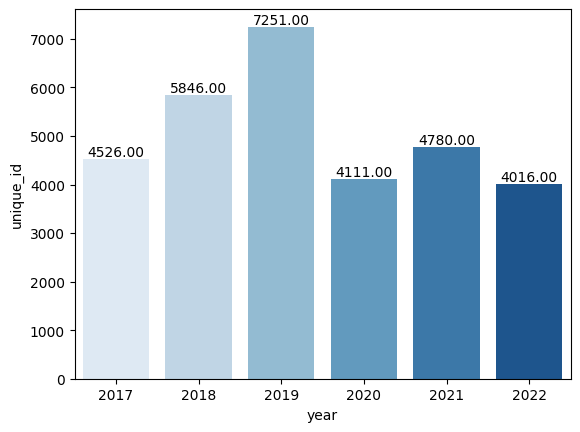

In [ ]:
import matplotlib.pyplot as plt
# Definir una paleta de colores de seaborn
colores = sns.color_palette("Blues")

# Crear el gráfico de barras con el cambio de colores
ax = sns.barplot(data=tweets_df_general_completo_year, x="year", y="unique_id", palette=colores)
# Mostrar los valores exactos encima de cada columna
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Mostrar el gráfico
plt.show()

## Analisis por clase y por año.

In [ ]:
tweets_df_general_completo_year = tweets_df_general_completo.groupby(by = ['Target', 'year']).count()[['unique_id']].reset_index(drop=False)


In [ ]:
tweets_df_general_completo_year.head()

,Target,year,unique_id
0,negative,2017,1342
1,negative,2018,1408
2,negative,2019,1929
3,negative,2020,961
4,negative,2021,1076


In [ ]:
tweets_df_general_completo_year = tweets_df_general_completo.groupby(by = ['Target', 'year']).count()[['unique_id']].reset_index(drop=False)
import seaborn as sns
sns.barplot(data=tweets_df_general_completo_year, x="year", y="unique_id", hue="Target")

NameError: ignored

## Análisis por clase por año y por mes de cada año.

### Análisis por clase y por mes de 2017

In [ ]:
# Filtramos el dataframe para quedarnos solo con el año 2017
tweets_df_2017 = tweets_df_general_completo[tweets_df_general_completo['year'] == 2017]

# Ahora realizamos el agrupamiento en el dataframe filtrado
tweets_df_2017_month = tweets_df_2017.groupby(by = ['Target', 'year', 'month']).count()[['unique_id']].reset_index(drop=False)


In [ ]:
tweets_df_2017_month.head(5)

,Target,year,month,unique_id
0,negative,2017,1,47
1,negative,2017,2,124
2,negative,2017,3,128
3,negative,2017,4,77
4,negative,2017,5,76


<Axes: xlabel='month', ylabel='unique_id'>

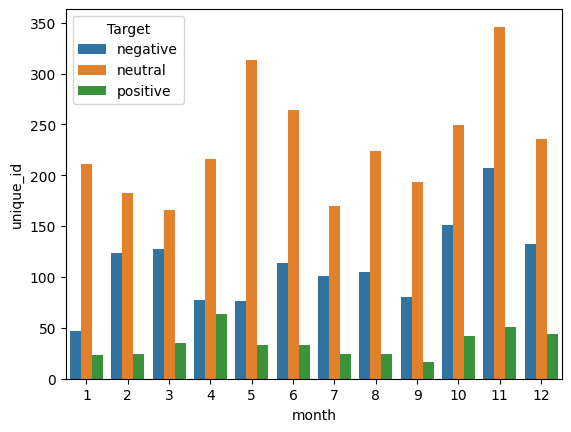

In [ ]:
import seaborn as sns
sns.barplot(data=tweets_df_2017_month, x="month", y="unique_id", hue="Target")

In [ ]:
import seaborn as sns

# Define los colores personalizados para cada categoría
colors = {'negative': 'red', 'neutral': 'navy', 'positive': 'green'}

# Crea el gráfico de barras y especifica la paleta de colores
sns.barplot(data=tweets_df_2017_month, x="month", y="unique_id", hue="Target", palette=colors.values())

# Muestra el gráfico
plt.show()


NameError: ignored

---------------------------------

In [ ]:
# Te quedas con lo que te interesa (texto limpio + target)
tweets_df_general_completo = tweets_df_general_completo[["Texto_Limpio", "Target"]].rename(columns={"Target": "sentiment"})

In [ ]:
class_conversion = {
    "negative": 1,
    "neutral": 2,
    "positive": 3
}
tweets_df_general_completo["sentiment"] = tweets_df_general_completo["sentiment"].apply(lambda x: class_conversion[x])

In [ ]:
# OJO, tienes un desequilibrio claro entre clases.
# Muy pocas muestras que representen a la clase positiva
# La gran mayoría son de clase neutra - puede darte problemas a la hora de entrenar
tweets_df_general_completo["sentiment"].value_counts(normalize=True)

2    0.640255
1    0.261415
3    0.098330
Name: sentiment, dtype: float64

In [ ]:
tweets_df_general_completo["sentiment"].value_counts()

2    19547
1     7981
3     3002
Name: sentiment, dtype: int64

In [ ]:
tweets_df_general_completo.head(20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Te quedas con el texto
X = tweets_df_general_completo.drop(columns=['sentiment'])

# Te quedas con el target
y = tweets_df_general_completo[['sentiment']]

# Dividir los datos en conjuntos de entrenamiento y prueba
# Añade estratificación para asegurarte que en el test vas a tener los mismos ratios de antes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"Ratios train: \n{y_train.value_counts(normalize=True)}\n")
print(f"Ratios test: \n{y_test.value_counts(normalize=True)}\n")

# Creas tu vectorizador de texto
tfidf_vectorizer = TfidfVectorizer()

# Primero tienes que ajustarlo con el set de entrenamiento (.fit())
# El formato de entrada más adecuado para el vectorizador es una lista de strings [texto_fila_1, texto_fila_2, ...]
# Luego transformas el texto a vector (.fit_transform())
# En este caso lo haces del tirón ambos pasos llamando a .fit_transform()
X_train_vectors = tfidf_vectorizer.fit_transform(X_train["Texto_Limpio"].tolist())

# En el caso del texto del test, lo transformas con el vectorizador que has ajustado en el train
X_test_vectors = tfidf_vectorizer.transform(X_test["Texto_Limpio"].tolist())

print(f"Shape train features: {X_train.shape} | Shape train target: {y_train.shape}  | Shape train features: {X_test.shape}  | Shape train target: {y_test.shape}  ")

Ratios train: 
sentiment
2            0.640272
1            0.261423
3            0.098305
dtype: float64

Ratios test: 
sentiment
2            0.640190
1            0.261382
3            0.098428
dtype: float64

Shape train features: (24424, 1) | Shape train target: (24424, 1)  | Shape train features: (6106, 1)  | Shape train target: (6106, 1)  


In [ ]:
X_train_vectors

<24424x23421 sparse matrix of type '<class 'numpy.float64'>'
	with 329862 stored elements in Compressed Sparse Row format>

## random forest

In [ ]:
from sklearn.metrics import classification_report
# Vamos a crear un RandomForest con 200 árboles con profundidad máxima de 4
# Además le añades un parámetro class_weight para que dé un mayor peso a los errores de la clase minoritaria
classifier = RandomForestClassifier(n_estimators=200, max_depth=4, class_weight="balanced", random_state=42)

# Entrenamos nuestro algoritmo con los vectores de train
classifier.fit(X_train_vectors, y_train.values.ravel())

# Predecimos para train y test usando los vectores
train_predictions = classifier.predict(X_train_vectors)
test_predictions = classifier.predict(X_test_vectors)

print(f"Accuracy train: {accuracy_score(y_train.values.ravel(), train_predictions)}")
print(f"Accuracy test: {accuracy_score(y_test.values.ravel(), test_predictions)}")

print(classification_report(y_test.values.ravel(), test_predictions))

Accuracy train: 0.6603750409433344
Accuracy test: 0.6311824434981985
              precision    recall  f1-score   support

           1       0.58      0.67      0.62      1596
           2       0.81      0.61      0.69      3909
           3       0.31      0.67      0.42       601

    accuracy                           0.63      6106
   macro avg       0.56      0.65      0.58      6106
weighted avg       0.70      0.63      0.65      6106



[]

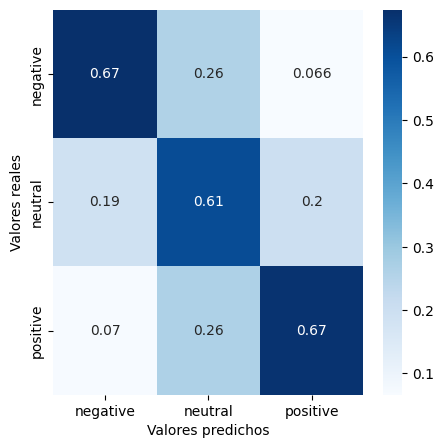

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

confusion_matrix = confusion_matrix(y_test.values.ravel(), test_predictions)
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

df_confusion_matrix_normalized = pd.DataFrame(
    confusion_matrix_normalized,
    index = [i for i in ("negative", "neutral", "positive")],
    columns = [i for i in ("negative", "neutral", "positive")]
)

plt.figure(figsize = (5, 5))
heatmap = sns.heatmap(df_confusion_matrix_normalized, annot=True,  cmap='Blues')
heatmap.set_xlabel('Valores predichos', fontsize=10)
heatmap.set_ylabel('Valores reales', fontsize=10)
plt.plot()

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(class_weight="balanced", random_state=42)

# Entrenamos nnuestro algoritmo con los vectores de train
classifier.fit(X_train_vectors, y_train.values.ravel())

# Predecimos para train y test usando los vectores
train_predictions = classifier.predict(X_train_vectors)
test_predictions = classifier.predict(X_test_vectors)

print(f"Accuracy train: {accuracy_score(y_train.values.ravel(), train_predictions)}")
print(f"Accuracy test: {accuracy_score(y_test.values.ravel(), test_predictions)}")

print(classification_report(y_test.values.ravel(), test_predictions))

Accuracy train: 0.8859318702915165
Accuracy test: 0.7946282345234196
              precision    recall  f1-score   support

           1       0.72      0.82      0.77      1596
           2       0.90      0.79      0.84      3909
           3       0.53      0.74      0.62       601

    accuracy                           0.79      6106
   macro avg       0.72      0.79      0.74      6106
weighted avg       0.82      0.79      0.80      6106



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


el 3 son las clases y el 23421 son las palabras con sus pesos en función de la clase a la que pertenecen.

## Gráfica palabras con más peso para las tres clases

In [ ]:
# Sería para la primera fila por tanto la fila es la primera
row_index = 0
important_tokens = pd.DataFrame(
    data=classifier.coef_[row_index],
    index=tfidf_vectorizer.get_feature_names_out(),
    columns=['coefficient']
).sort_values(by='coefficient', ascending=False).reset_index(drop=False)


In [ ]:
print(important_tokens.head(10))

        index  coefficient
0     garbage     4.780095
1  vulnerable     4.672920
2         bad     4.164836
3    suspends     4.090944
4  threatened     4.063754
5      danger     3.674089
6        lack     3.619362
7      suffer     3.591621
8       worst     3.471679
9        lose     3.385115


In [ ]:
classifier.coef_ #esto son los pesos que asigna mi odelo a cada variable/
#peso1*variable1 +peso2*variable 2 y a mayor peso mayor importancia

array([[-0.25572628, -0.00384061, -0.03914874, ..., -0.0365272 ,
        -0.03353246, -0.0206566 ],
       [-0.24967277,  0.04119054,  0.08190066, ...,  0.04623781,
         0.11577137,  0.02764025],
       [ 0.50539904, -0.03734994, -0.04275192, ..., -0.00971061,
        -0.08223891, -0.00698365]])

paLABRAS NEGATIVAS


<ipython-input-31-b6f9c0e629ab>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")


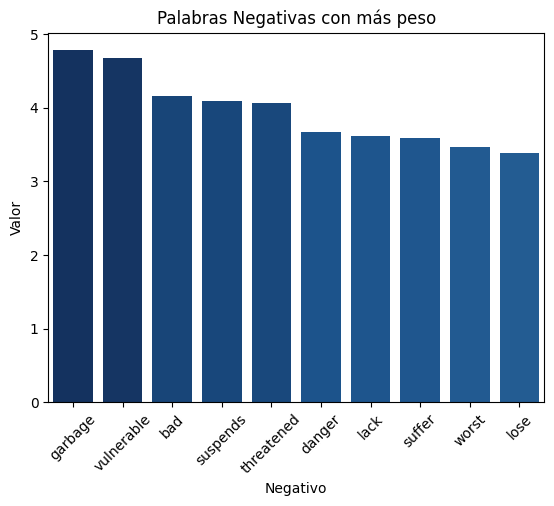

In [ ]:
# Sería para la primera fila por tanto la fila es la NEGATIVOS
row_index = 0
important_tokens = pd.DataFrame(
    data=classifier.coef_[row_index],
    index=tfidf_vectorizer.get_feature_names_out(),
    columns=['coefficient']
).sort_values(by='coefficient', ascending=False).reset_index(drop=False)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creamos una nueva columna normalizando la columna 'coefficient'
important_tokens['normalized_coefficient'] = (important_tokens['coefficient'] - min(important_tokens['coefficient'])) / (max(important_tokens['coefficient']) - min(important_tokens['coefficient']))

# Creamos una paleta de colores azules
cmap = plt.cm.get_cmap("Blues")

sns.barplot(data=important_tokens.head(10), x="index", y="coefficient", palette=cmap(important_tokens['normalized_coefficient'].head(10)))
plt.xlabel('Negativo')
plt.ylabel('Valor')
plt.title('Palabras Negativas con más peso')
plt.xticks(rotation= 45)
plt.show()


pALABRAS NEUTRAS

<ipython-input-36-c824ed7c5e4c>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")


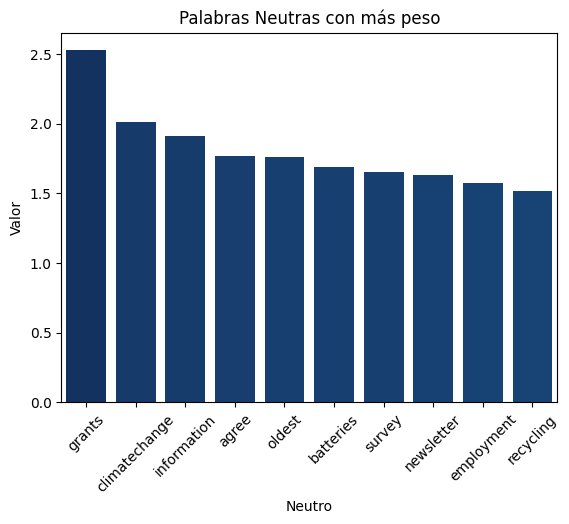

In [ ]:
# Sería para la primera fila por tanto la fila es la NEGATIVOS
row_index = 1
important_tokens = pd.DataFrame(
    data=classifier.coef_[row_index],
    index=tfidf_vectorizer.get_feature_names_out(),
    columns=['coefficient']
).sort_values(by='coefficient', ascending=False).reset_index(drop=False)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creamos una nueva columna normalizando la columna 'coefficient'
important_tokens['normalized_coefficient'] = (important_tokens['coefficient'] - min(important_tokens['coefficient'])) / (max(important_tokens['coefficient']) - min(important_tokens['coefficient']))

# Ajustamos el rango de la normalización para hacer las diferencias de colores más pronunciadas
important_tokens['adjusted_coefficient'] = 0.5 * important_tokens['normalized_coefficient'] + 0.5

# Creamos una paleta de colores azules
cmap = plt.cm.get_cmap("Blues")

sns.barplot(data=important_tokens.head(10), x="index", y="coefficient", palette=cmap(important_tokens['adjusted_coefficient'].head(10)))
plt.xlabel('Neutro')
plt.ylabel('Valor')
plt.title('Palabras Neutras con más peso')
plt.xticks(rotation= 45)
plt.show()


pALABRAS PSOITIVAS

<ipython-input-33-61c5504bfe00>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")


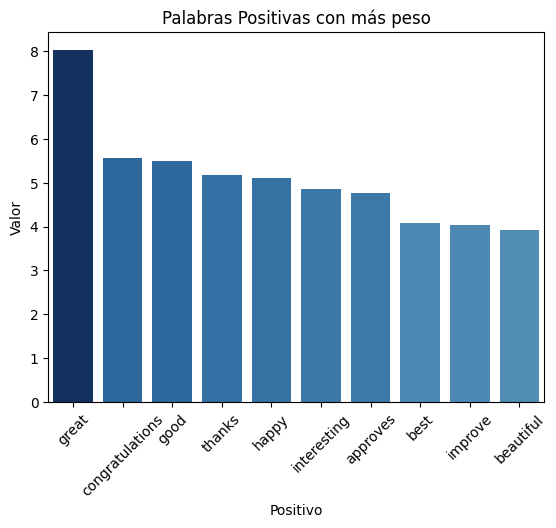

In [ ]:
# Sería para la primera fila por tanto la fila es la NEGATIVOS
row_index = 2
important_tokens = pd.DataFrame(
    data=classifier.coef_[row_index],
    index=tfidf_vectorizer.get_feature_names_out(),
    columns=['coefficient']
).sort_values(by='coefficient', ascending=False).reset_index(drop=False)

import seaborn as sns
import matplotlib.pyplot as pltaaa
import numpy as np

# Creamos una nueva columna normalizando la columna 'coefficient'
important_tokens['normalized_coefficient'] = (important_tokens['coefficient'] - min(important_tokens['coefficient'])) / (max(important_tokens['coefficient']) - min(important_tokens['coefficient']))

# Creamos una paleta de colores azules
cmap = plt.cm.get_cmap("Blues")

sns.barplot(data=important_tokens.head(10), x="index", y="coefficient", palette=cmap(important_tokens['normalized_coefficient'].head(10)))
plt.xlabel('Positivo')
plt.ylabel('Valor')
plt.title('Palabras Positivas con más peso')
plt.xticks(rotation= 45)
plt.show()


<ipython-input-34-24b36e18a7af>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")


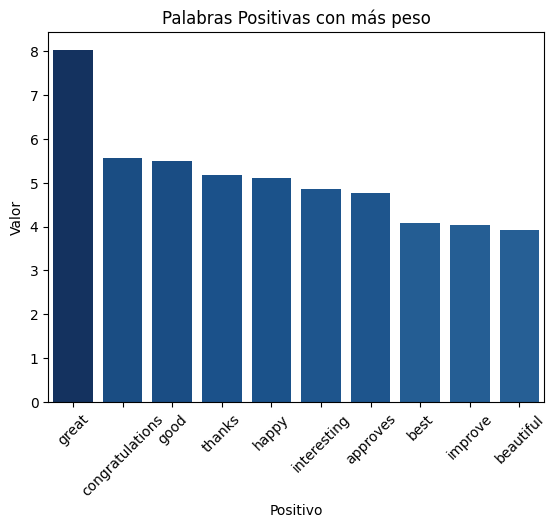

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creamos una nueva columna normalizando la columna 'coefficient'
important_tokens['normalized_coefficient'] = (important_tokens['coefficient'] - min(important_tokens['coefficient'])) / (max(important_tokens['coefficient']) - min(important_tokens['coefficient']))

# Ajustamos el rango de la normalización para hacer las diferencias de colores más pronunciadas
important_tokens['adjusted_coefficient'] = 0.5 * important_tokens['normalized_coefficient'] + 0.5

# Creamos una paleta de colores azules
cmap = plt.cm.get_cmap("Blues")

sns.barplot(data=important_tokens.head(10), x="index", y="coefficient", palette=cmap(important_tokens['adjusted_coefficient'].head(10)))
plt.xlabel('Positivo')
plt.ylabel('Valor')
plt.title('Palabras Positivas con más peso')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
tweets_df_general_completo[tweets_df_general_completo['Contaminado'] == True]

,Texto_Limpio,sentiment,Contaminado
14874,comes environment pucela fencedoid bicyclepcl ...,2,True
20562,carry telework Im staying home ______________r...,2,True
28105,think climate change roll spoiled forecasts ma...,2,True
28336,looks like going hot itll climate change itll ...,3,True


[]

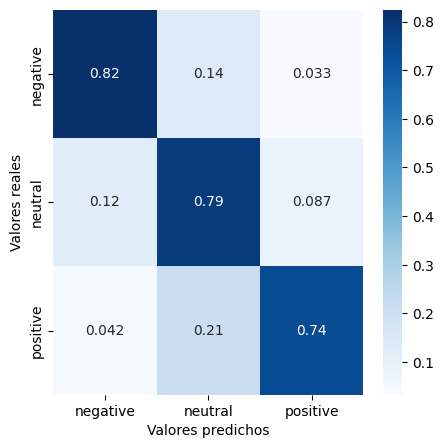

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

confusion_matrix = confusion_matrix(y_test.values.ravel(), test_predictions)
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

df_confusion_matrix = pd.DataFrame(
    confusion_matrix,
    index = [i for i in ("negative", "neutral", "positive")],
    columns = [i for i in ("negative", "neutral", "positive")]
)

df_confusion_matrix_normalized = pd.DataFrame(
    confusion_matrix_normalized,
    index = [i for i in ("negative", "neutral", "positive")],
    columns = [i for i in ("negative", "neutral", "positive")]
)

plt.figure(figsize = (5, 5))
heatmap = sns.heatmap(df_confusion_matrix_normalized, annot=True, cmap = 'Blues')
heatmap.set_xlabel('Valores predichos', fontsize=10)
heatmap.set_ylabel('Valores reales', fontsize=10)
plt.plot()

## Modelo SVM (Support Vector Machines)

In [ ]:
from sklearn.svm import SVC
# Vamos a crear un SVM balanceando los datos y con una semilla = 42
# Además le añades un parámetro class_weight para que dé un mayor peso a los errores de la clase minoritaria(parametro para entrenar desequilibrio entre clases)
classifier = SVC(class_weight="balanced", random_state=42)

# Entrenamos nnuestro algoritmo con los vectores de train
classifier.fit(X_train_vectors, y_train.values.ravel())

# Predecimos para train y test usando los vectores
train_predictions = classifier.predict(X_train_vectors)
test_predictions = classifier.predict(X_test_vectors)

print(f"Accuracy train: {accuracy_score(y_train.values.ravel(), train_predictions)}")
print(f"Accuracy test: {accuracy_score(y_test.values.ravel(), test_predictions)}")

print(classification_report(y_test.values.ravel(), test_predictions))

Accuracy train: 0.9750245660006551
Accuracy test: 0.827382902063544
              precision    recall  f1-score   support

           1       0.77      0.80      0.79      1596
           2       0.86      0.88      0.87      3909
           3       0.72      0.54      0.62       601

    accuracy                           0.83      6106
   macro avg       0.79      0.74      0.76      6106
weighted avg       0.82      0.83      0.82      6106



fila 1: precision de la clase 1

[]

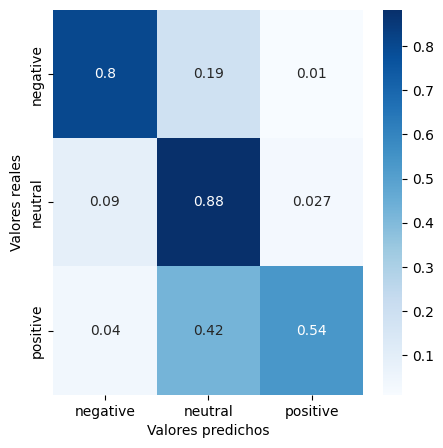

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

confusion_matrix = confusion_matrix(y_test.values.ravel(), test_predictions)
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

df_confusion_matrix = pd.DataFrame(
    confusion_matrix,
    index = [i for i in ("negative", "neutral", "positive")],
    columns = [i for i in ("negative", "neutral", "positive")]
)

df_confusion_matrix_normalized = pd.DataFrame(
    confusion_matrix_normalized,
    index = [i for i in ("negative", "neutral", "positive")],
    columns = [i for i in ("negative", "neutral", "positive")]
)

plt.figure(figsize = (5, 5))
heatmap = sns.heatmap(df_confusion_matrix_normalized, annot=True, cmap = 'Blues')
heatmap.set_xlabel('Valores predichos', fontsize=10)
heatmap.set_ylabel('Valores reales', fontsize=10)
plt.plot()

Plotear los resultados obtenidos.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# Se ajusta y se transforma X_train_vectors
reduced_train_features = pca.fit_transform(X_train_vectors)

# Se ajusta y se transforma X_test_vectors
reduced_test_features = pca.transform(X_test_vectors)

In [ ]:
plt.scatter(reduced_train_features[:, 0], reduced_features[:, 1], c=labels)
plt.show()

-----
## Matriz de correlación en resultados
-----



In [ ]:
tweets_df_general_completo = pd.read_csv("/content/Tweets_df_General_completo_etiquetado.csv")

# Visualizaciones

In [ ]:
#Leemos la base de datos
import pandas as pd
data = pd.read_csv('/content/tweets_df_general_completo_datetime_dividido (1).csv')

In [ ]:
data.shape

(30530, 20)

In [ ]:
data = data[data["Target"]!="neutral"]

In [ ]:
data["month-year"] = data.apply(lambda x: str(x["year"]) + '-' + str(x["month"]).rjust(2, "0"), axis=1)

In [ ]:
data.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,year,month,day,hour
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,20
1,2017-12-30 18:30:25,the climate change causes more frequent and in...,cambioclimastop,4673.0,NaN,0.0,3.0,7.0,cambioclimastop_97e82469,['😥😥'],"['climate', 'change', 'causes', 'frequent', 'i...","['climat', 'chang', 'caus', 'frequent', 'inten...",112,climate change causes frequent intense periods...,negative,SI,2017,12,30,18
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral,SI,2017,12,30,14
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral,SI,2017,12,30,10
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,3


## Boxplot (percentiles por año y sentimiento)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10, 5)})

In [ ]:
data[["replyCount", "likeCount", "retweetCount", "Longitud_Tweet"]].describe(percentiles=np.arange(0, 1, 0.1))

,replyCount,likeCount,retweetCount,Longitud_Tweet
count,10983.000000,10983.000000,10983.000000,10983.000000
mean,0.468451,6.140581,3.914140,147.986616
std,10.769251,54.924833,28.278679,62.850113
min,0.000000,0.000000,0.000000,26.000000
0%,0.000000,0.000000,0.000000,26.000000
10%,0.000000,0.000000,0.000000,70.000000
20%,0.000000,0.000000,0.000000,84.000000
30%,0.000000,0.000000,0.000000,100.000000
40%,0.000000,0.000000,0.000000,117.000000
50%,0.000000,1.000000,0.000000,143.000000


In [ ]:
df_filtrado_USERNAME = data.loc[data['Longitud_Tweet'] > 100000]

df_filtrado_USERNAME_1 = df_filtrado_USERNAME[df_filtrado_USERNAME['likeCount'] <= 100]



df_filtrado_USERNAME_1.shape

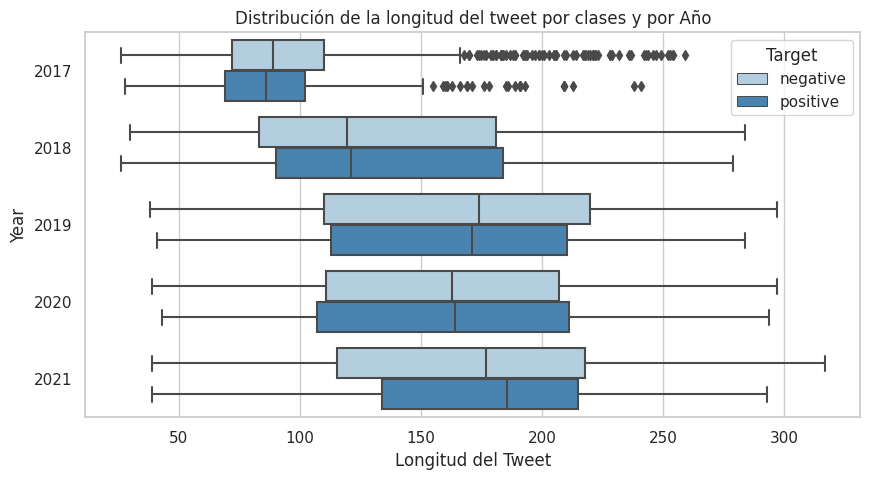

In [ ]:
# Plotting the data using Seaborn
sns.set_style('whitegrid')

# Create a boxplot using Seaborn
sns.boxplot(x='Longitud_Tweet', y='year', hue='Target', data=data, orient="h", palette="Blues")

# Set the x-axis label
plt.xlabel('Longitud del Tweet')

# Set the y-axis label
plt.ylabel('Year')

# Set the plot title
plt.title('Distribución de la longitud del tweet por clases y por Año')

# Display the plot
plt.show()


In [ ]:

data_filtrado_ltweet = data[data['Longitud_Tweet'] <= 250  ]

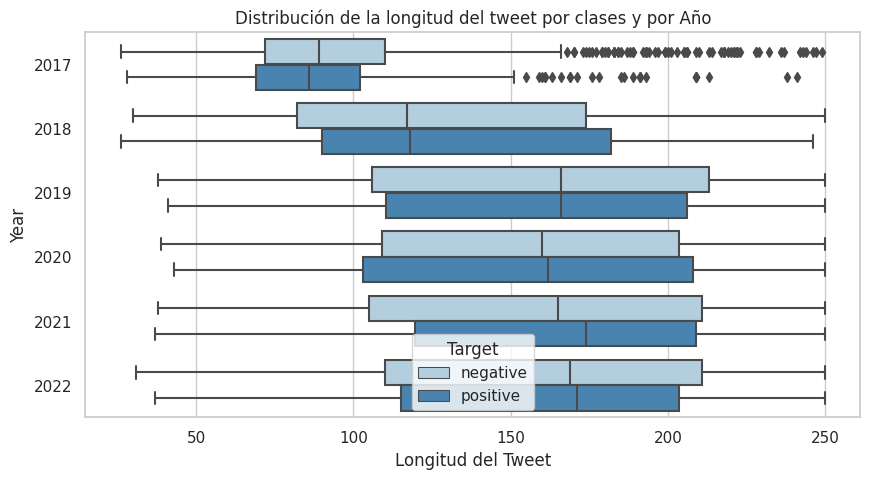

In [ ]:
# Plotting the data using Seaborn
sns.set_style('whitegrid')

# Create a boxplot using Seaborn
sns.boxplot(x='Longitud_Tweet', y='year', hue='Target', data=data_filtrado_ltweet, orient="h", palette="Blues")

# Set the x-axis label
plt.xlabel('Longitud del Tweet')

# Set the y-axis label
plt.ylabel('Year')

# Set the plot title
plt.title('Distribución de la longitud del tweet por clases y por Año')

# Display the plot
plt.show()

## Boxplot para numero de likes eliminando los outliers

In [ ]:
df_filtrado_likes = data[data['likeCount'] <= 100]

In [ ]:
df_filtrado_likes.shape

(10897, 21)

In [ ]:
index_of_max = data['likeCount'].idxmax()

# Usar ese índice para obtener la fila completa
row_with_max = data.loc[index_of_max]
index_of_max = data['likeCount'].idxmax()

# Usar ese índice para obtener la fila completa
row_with_max

Datetime                                             2019-06-05 11:19:03
Text                   We are the last generation that can slow clima...
Username                                                 sanchezcastejon
followersCount                                                 1748193.0
location                                                             NaN
replyCount                                                         893.0
retweetCount                                                      1544.0
likeCount                                                         4081.0
unique_id                                       sanchezcastejon_9cd4f980
emojis                                                                []
tokens                 ['last', 'generation', 'slow', 'climate', 'cha...
lemmas                 ['last', 'generat', 'slow', 'climat', 'chang',...
Longitud_Tweet                                                       230
Texto_Limpio           last generation slow climate

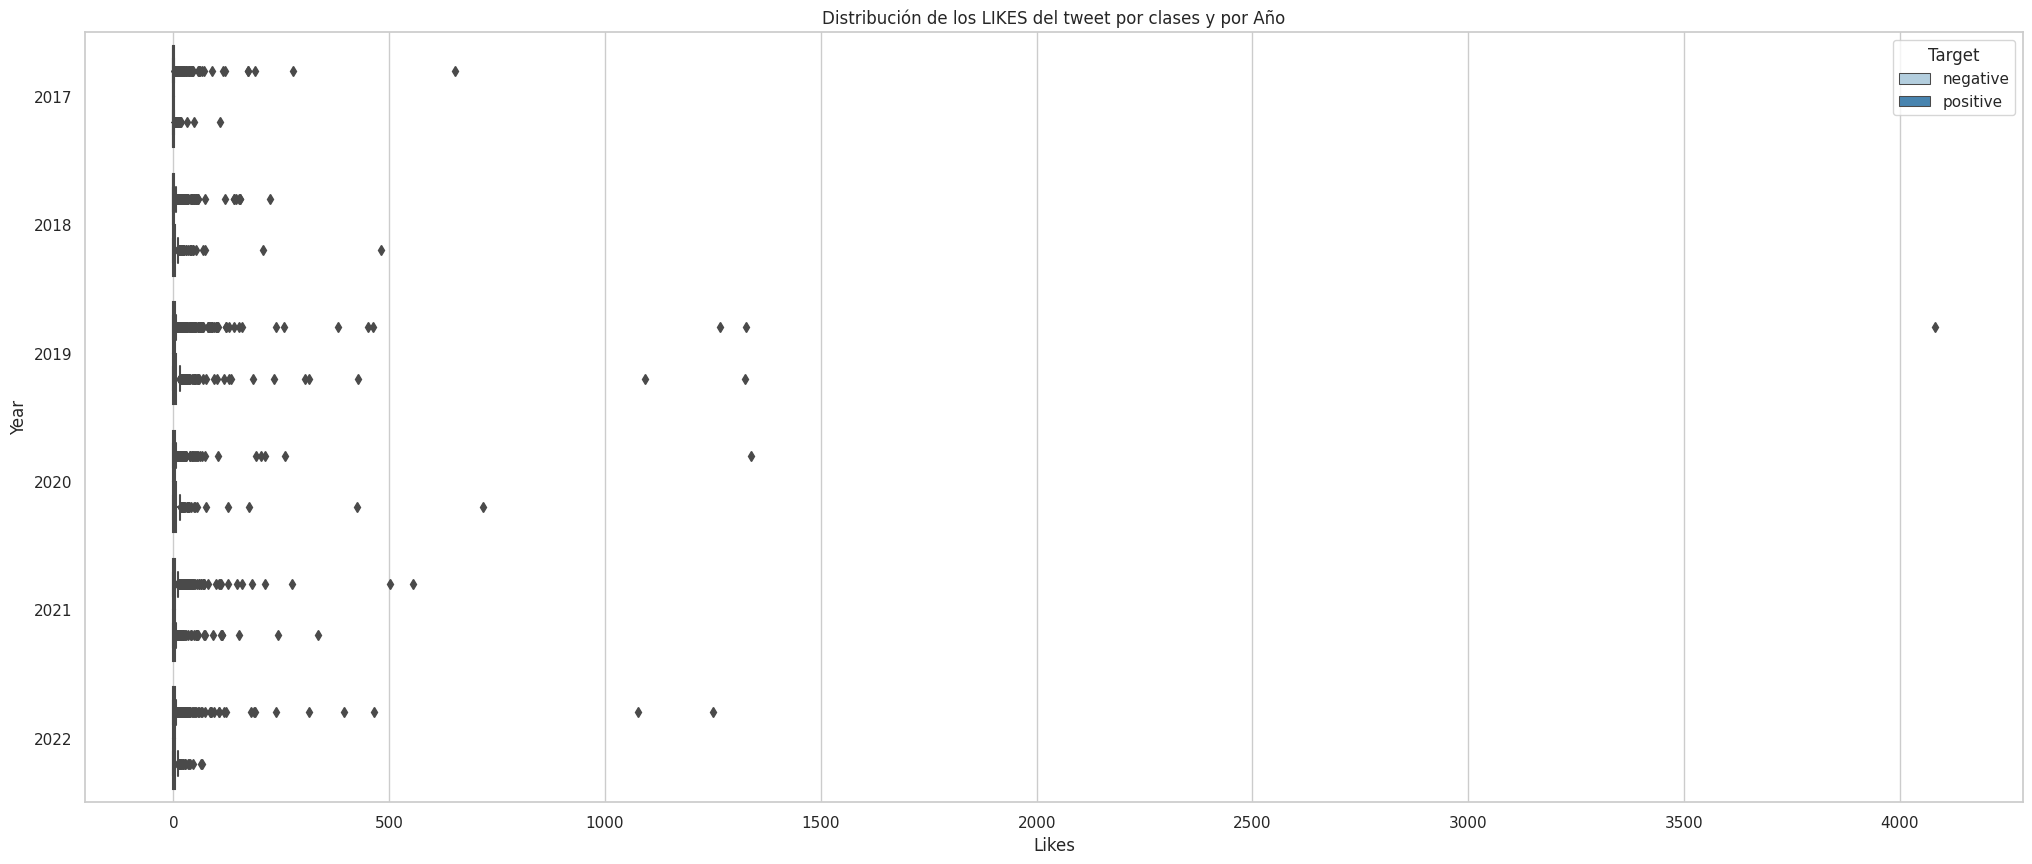

In [ ]:
# Plotting the data using Seaborn
sns.set_style('whitegrid')

# Create a boxplot using Seaborn
sns.boxplot(x='likeCount', y='year', hue='Target', data=data, orient="h", palette="Blues")

# Set the x-axis label
plt.xlabel('Likes')

# Set the y-axis label
plt.ylabel('Year')

# Set the plot title
plt.title('Distribución de los LIKES del tweet por clases y por Año')

# Display the plot
plt.show()


# Evolucion tweets por mes/año (desde 2019 pre-covid)

In [ ]:
df_grouped = data.groupby(["month-year", 'Target'])['unique_id'].count().reset_index()

In [ ]:
df_grouped = df_grouped.rename(columns={"unique_id": "numero_de_tweets", "Target": "sentimiento"})
df_grouped

,month-year,sentimiento,numero_de_tweets
0,2017-01,negative,47
1,2017-01,positive,23
2,2017-02,negative,124
3,2017-02,positive,24
4,2017-03,negative,128
...,...,...,...
139,2022-10,positive,35
140,2022-11,negative,111
141,2022-11,positive,32
142,2022-12,negative,61


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25, 10)})

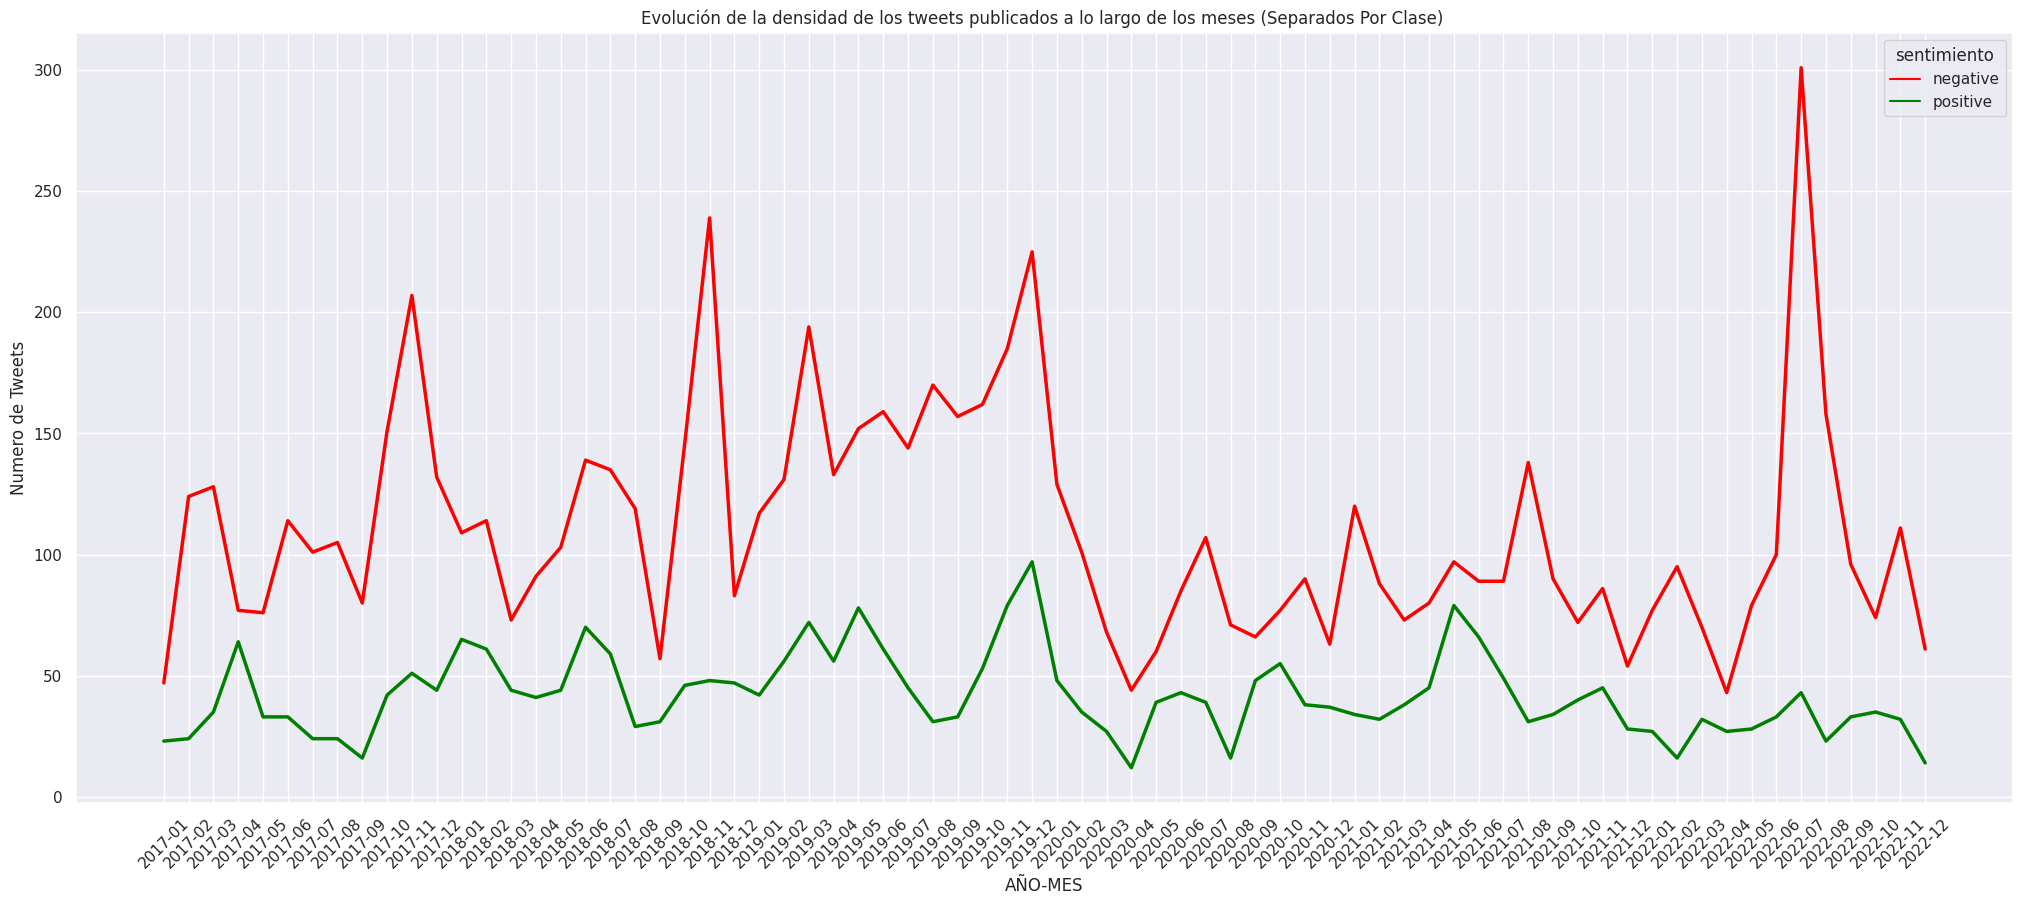

In [ ]:
# Definir la paleta de colores como un diccionario
palette = {"negative": "red", "positive": "green"}

# Plotting the data using Seaborn
sns.set_style('darkgrid')

# Create a line plot
sns.lineplot(x='month-year', y='numero_de_tweets', hue='sentimiento', data=df_grouped, palette=palette, lw=2.5)

# Set the x-axis label
plt.xlabel('AÑO-MES')

# Set the y-axis label
plt.ylabel('Numero de Tweets')

# Set the plot title
plt.title('Evolución de la densidad de los tweets publicados a lo largo de los meses (Separados Por Clase) ')

# Rotate ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
df_filtrado_USERNAME = data.loc[data['followersCount'] > 100000]

df_filtrado_USERNAME_1 = df_filtrado_USERNAME[df_filtrado_USERNAME['likeCount'] <= 100]


df_filtrado_USERNAME_1.shape

(727, 21)

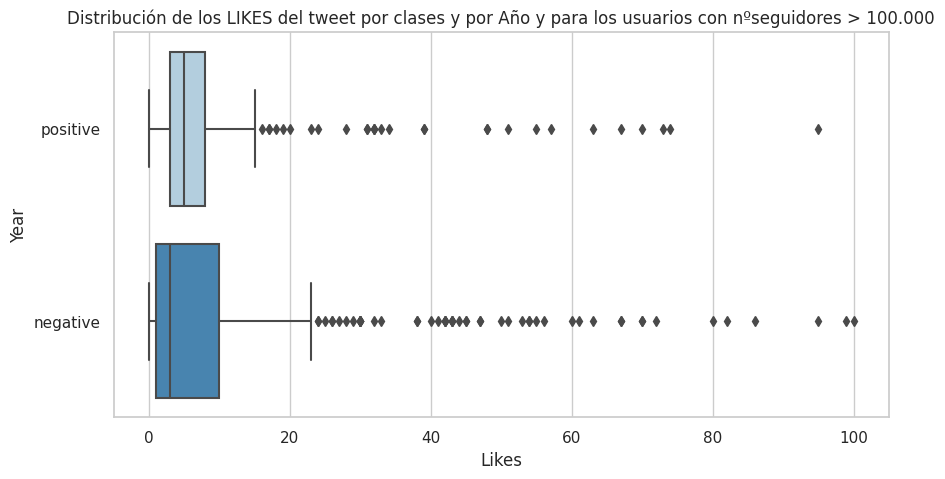

In [ ]:
# Plotting the data using Seaborn
sns.set_style('whitegrid')

# Create a boxplot using Seaborn
sns.boxplot(x='likeCount', y='Target', data=df_filtrado_USERNAME_1, orient="h", palette="Blues")

# Set the x-axis label
plt.xlabel('Likes')

# Set the y-axis label
plt.ylabel('Year')

# Set the plot title
plt.title('Distribución de los LIKES del tweet por clases y por Año y para los usuarios con nºseguidores > 100.000')

# Display the plot
plt.show()


In [ ]:
data = data.groupby(by = ['Target', 'year']).count()[['unique_id']].reset_index(drop=False)


In [ ]:
hue_colors = {"positive": "green", "negative": "red"}

ax = sns.barplot(data=data, x="year", y="unique_id", hue="Target", palette=hue_colors)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Número de tweets')

# Set the plot title
ax.set_title('Número de tweets por Año y por Clase')

# Display the plot
plt.show()

KeyError: ignored

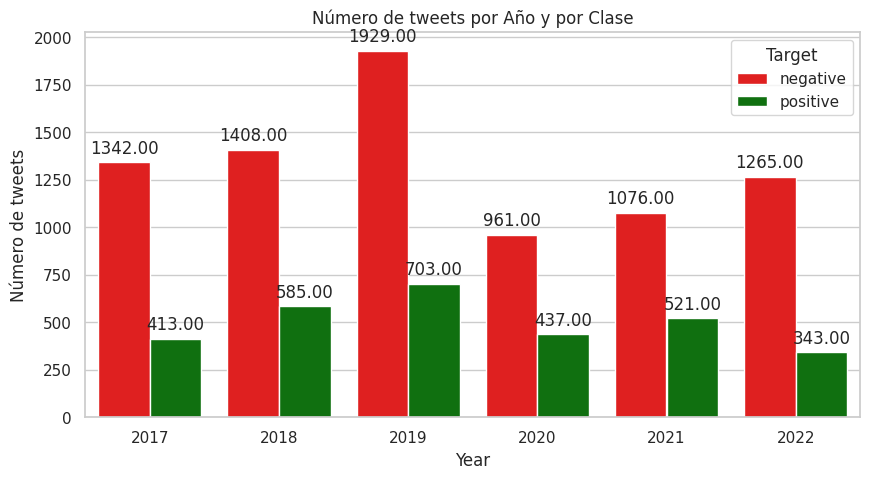

In [ ]:
hue_colors = {"positive": "green", "negative": "red"}

ax = sns.barplot(data=data, x="year", y="unique_id", hue="Target", palette=hue_colors)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Número de tweets')

# Set the plot title
ax.set_title('Número de tweets por Año y por Clase')

# loop to add value on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center',
                   va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Display the plot
plt.show()


# VARIABLE LOCATION

In [ ]:
data.head(3)

NameError: ignored

In [ ]:
import json

datos = pd.read_csv('/content/tweets_df_general_completo_datetime_dividido (1).csv')
with open('/content/poblaciones.json') as f:
  poblaciones = json.load(f)

  # Extraer los datos de la etiqueta "label" y quedarse solo con lo anterior a "/" o ","
ciudades = [poblacion['label'].split('/')[0].split(',')[0].strip() for poblacion in poblaciones]


# Eliminar los valores NaN en la columna 'location'
datos.dropna(subset=['location'], inplace=True)
datos.head()


,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,year,month,day,hour
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,20
2,2017-12-30 14:52:00,climate change Iceland shines with environment...,roblamas,1258.0,Ubicuo,0.0,0.0,1.0,roblamas_328dc9b7,[],"['climate', 'change', 'Iceland', 'shines', 'en...","['climat', 'chang', 'iceland', 'shine', 'envir...",108,climate change Iceland shines environmental te...,neutral,SI,2017,12,30,14
3,2017-12-30 10:25:24,We can modernize Spain by fighting climate cha...,Pere__Joan,308.0,"Mallorca, Illes Balears",0.0,1.0,1.0,Pere__Joan_c3061015,[],"['modernize', 'Spain', 'fighting', 'climate', ...","['modern', 'spain', 'fight', 'climat', 'chang'...",214,modernize Spain fighting climate change electr...,neutral,SI,2017,12,30,10
4,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,3
5,2017-12-29 18:52:46,Unfortunately don andrés in spain as opposed t...,OscarDS,48263.0,"Irun, Madrid 🌐",0.0,0.0,1.0,OscarDS_0722c493,[],"['Unfortunately', 'andrés', 'spain', 'opposed'...","['unfortun', 'andré', 'spain', 'oppos', 'portu...",218,Unfortunately andrés spain opposed portugal go...,negative,SI,2017,12,29,18


In [ ]:
# Filtrar el DataFrame para mantener solo las filas que estén en 'ciudades'
data_ubicaciones = datos[datos['location'].isin(ciudades)]

In [ ]:
data_ubicaciones.shape

(2979, 20)

In [ ]:
data_ubicaciones.to_csv('DF_Filtrado_Ubicaciones.csv', index=False)

In [ ]:
datos = pd.read_csv('/content/DF_Filtrado_Ubicaciones.csv')
datos.head()

,Datetime,Text,Username,followersCount,location,replyCount,retweetCount,likeCount,unique_id,emojis,tokens,lemmas,Longitud_Tweet,Texto_Limpio,Target,palabras_frecuentes,year,month,day,hour
0,2017-12-30 20:04:34,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_e35cca0a,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,20
1,2017-12-30 03:21:11,the houses with marine container in Spain incr...,imodhaus,1363.0,Barcelona,0.0,0.0,0.0,imodhaus_4fc78337,[],"['houses', 'marine', 'container', 'Spain', 'in...","['hous', 'marin', 'contain', 'spain', 'increas...",89,houses marine container Spain increase demand ...,neutral,NO,2017,12,30,3
2,2017-12-23 18:03:22,with the minister of agriculture fishing food ...,jatirado,77258.0,Madrid,0.0,3.0,7.0,jatirado_a0e0e5b6,['🇪🇸'],"['minister', 'agriculture', 'fishing', 'food',...","['minist', 'agricultur', 'fish', 'food', 'envi...",199,minister agriculture fishing food environment ...,neutral,SI,2017,12,23,18
3,2017-12-23 18:03:22,with the minister of agriculture fishing food ...,jatirado,77258.0,Madrid,0.0,0.0,1.0,jatirado_446d5f9b,['🇪🇸'],"['minister', 'agriculture', 'fishing', 'food',...","['minist', 'agricultur', 'fish', 'food', 'envi...",199,minister agriculture fishing food environment ...,neutral,SI,2017,12,23,18
4,2017-12-22 14:01:18,Spain has technology and financing to lead the...,edujeszgz,1813.0,Zaragoza,0.0,2.0,2.0,edujeszgz_905f6157,[],"['Spain', 'technology', 'financing', 'lead', '...","['spain', 'technolog', 'financ', 'lead', 'ener...",80,Spain technology financing lead energy transit...,neutral,SI,2017,12,22,14


In [ ]:
locations = datos['location'].unique()

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import OpenCage

# Debes usar tu propia clave API.
geolocator = OpenCage('https://api.opencagedata.com/geocode/v1/json?q=URI-ENCODED-PLACENAME&key=YOUR-API-KEY')

def get_location_by_name(name):
    location = geolocator.geocode(name)
    return (location.latitude, location.longitude)


coordinates = []

for city in locations:
    lat_lon = get_location_by_name(city)
    coordinates.append(lat_lon)

print(coordinates)

GeocoderAuthenticationFailure: ignored

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="geoapiExercises")

def get_location_by_name(name):
    location = geolocator.geocode(name)
    return (location.latitude, location.longitude)



coordinates = []

for city in datos['location']:
    try:
        lat_lon = get_location_by_name(city)
        coordinates.append(lat_lon)
    except AttributeError: # En ocasiones, la geocodificación puede devolver None, por lo que capturamos el error aquí.
        coordinates.append((None, None))
    # Para evitar el error Too Many Requests, hacemos una pausa después de cada petición.
    time.sleep(1)

datos['Coordenadas'] = coordinates

print(df)


GeocoderInsufficientPrivileges: ignored